In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt


def file_to_json(filename):
  with open(filename) as json_file: 
      data = json.load(json_file) 
  return data

In [23]:
dlib_annotated = file_to_json('/content/dlib_annotation_resized.json')
faces_annotated = file_to_json('/content/faces_annotated.json')
mtcnn_annotated = file_to_json('/content/mtcnn_annotated_resized.json')
retinanet_annotated = file_to_json('/content/retinanet_annotated_resized.json')
violajones_annotated = file_to_json('/content/violajones_annotations_resized.json')

In [24]:
print(faces_annotated['0'])
print(dlib_annotated['0'])
print(mtcnn_annotated['0'])
print(retinanet_annotated['0'])
print(violajones_annotated)





{'bounding_box': {'x': 170.0, 'y': 110.0, 'w': 346.0, 'h': 467.0}, 'landmarks': {'left_eye': [256.0, 284.0], 'right_eye': [418.0, 278.0], 'nose': [344.0, 354.0], 'left_mouth': [274.0, 442.0], 'right_mouth': [428.0, 430.0]}}
{'bounding_box': {'x': 81.0, 'y': 81.0, 'w': 155.0, 'h': 155.0}, 'landmarks': {'left_eye': [117.0, 127.5], 'right_eye': [187.0, 125.0], 'nose': [155.0, 155.0], 'left_mouth': [121.0, 194.0], 'right_mouth': [193.0, 191.0]}}
{'bounding_box': {'x': 75.08161926269531, 'y': 49.37025451660156, 'w': 152.14666748046875, 'h': 197.97425842285156}, 'landmarks': {'left_eye': [118.37440490722656, 126.61767578125], 'right_eye': [187.8458251953125, 123.91761779785156], 'nose': [153.57379150390625, 159.09237670898438], 'left_mouth': [121.00163269042969, 195.56764221191406], 'right_mouth': [190.81802368164062, 193.5807647705078]}}
{'bounding_box': {'x': 75.0, 'y': 40.0, 'w': 150.0, 'h': 216.0}, 'landmarks': {'left_eye': [114, 127], 'right_eye': [186, 122], 'nose': [153, 161], 'left_m

In [20]:
import os
from PIL import Image 
faces_annotated_resize = faces_annotated

directory = r'/content/width'
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        filepath =(os.path.join(directory, filename))
        img = Image.open(filepath)
        scale_factor = 300/img.width
        id = (str(int(filename.split("_")[0])))

        faces_annotated_resize[id]["bounding_box"]["x"] = faces_annotated_resize[id]["bounding_box"]["x"] * scale_factor
        faces_annotated_resize[id]["bounding_box"]["y"] = faces_annotated_resize[id]["bounding_box"]["y"] * scale_factor
        faces_annotated_resize[id]["bounding_box"]["w"] = faces_annotated_resize[id]["bounding_box"]["w"] * scale_factor
        faces_annotated_resize[id]["bounding_box"]["h"] = faces_annotated_resize[id]["bounding_box"]["h"] * scale_factor

        left_eye = faces_annotated_resize[id]["landmarks"]["left_eye"]
        right_eye = faces_annotated_resize[id]["landmarks"]["right_eye"]
        nose = faces_annotated_resize[id]["landmarks"]["nose"]
        left_mouth = faces_annotated_resize[id]["landmarks"]["left_mouth"]
        right_mouth = faces_annotated_resize[id]["landmarks"]["right_mouth"]


        faces_annotated_resize[id]["landmarks"]["left_eye"] = [left_eye[0]*scale_factor,left_eye[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["right_eye"] = [right_eye[0]*scale_factor,right_eye[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["nose"] = [nose[0]*scale_factor,nose[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["left_mouth"] = [left_mouth[0]*scale_factor,left_mouth[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["right_mouth"] = [right_mouth[0]*scale_factor,right_mouth[1]*scale_factor]


        


    else:
        continue

In [36]:
print(faces_annotated)
print(faces_annotated_resize)
faces_annotated = faces_annotated_resize
print(faces_annotated)

{'0': {'bounding_box': {'x': 170.0, 'y': 110.0, 'w': 346.0, 'h': 467.0}, 'landmarks': {'left_eye': [256.0, 284.0], 'right_eye': [418.0, 278.0], 'nose': [344.0, 354.0], 'left_mouth': [274.0, 442.0], 'right_mouth': [428.0, 430.0]}}, '1': {'bounding_box': {'x': 335.0, 'y': 293.0, 'w': 468.0, 'h': 592.0}, 'landmarks': {'left_eye': [465.0, 486.0], 'right_eye': [692.0, 507.0], 'nose': [580.0, 583.0], 'left_mouth': [462.0, 704.0], 'right_mouth': [692.0, 713.0]}}, '2': {'bounding_box': {'x': 156.0, 'y': 241.0, 'w': 485.0, 'h': 684.0}, 'landmarks': {'left_eye': [259.0, 464.0], 'right_eye': [493.0, 438.0], 'nose': [373.0, 570.0], 'left_mouth': [290.0, 702.0], 'right_mouth': [526.0, 676.0]}}, '3': {'bounding_box': {'x': 145.0, 'y': 189.0, 'w': 421.0, 'h': 568.0}, 'landmarks': {'left_eye': [279.0, 390.0], 'right_eye': [465.0, 396.0], 'nose': [386.0, 471.0], 'left_mouth': [286.0, 590.0], 'right_mouth': [463.0, 590.0]}}, '4': {'bounding_box': {'x': 602.0, 'y': 337.0, 'w': 671.0, 'h': 870.0}, 'landma

In [37]:
def compare(groundtruth,algorithm):
  difference = {}
  for id in range(48):
    id=str(id)
    alg = (algorithm[id]["landmarks"])
    ground = (groundtruth[id]["landmarks"])
    norm_factor =(np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["left_eye"])))

    dist_left_eye = (np.linalg.norm(np.array(alg["left_eye"])-np.array(ground["left_eye"])))/ norm_factor
    dist_right_eye = (np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["right_eye"])))/ norm_factor
    dist_nose = (np.linalg.norm(np.array(alg["nose"])-np.array(ground["nose"])))/ norm_factor
    dist_left_mouth = (np.linalg.norm(np.array(alg["left_mouth"])-np.array(ground["left_mouth"])))/ norm_factor
    dist_right_mouth = (np.linalg.norm(np.array(alg["right_mouth"])-np.array(ground["right_mouth"])))/ norm_factor

    # print("ID:",id)
    # print("left_eye_distance:",dist_left_eye,"\tright_eye_distance:",dist_right_eye)
    # print("nose_distance:",dist_nose)
    # print("left_mouth_distance:",dist_left_mouth,"\tright_mouth_distance:",dist_right_mouth)
    # print("")
    difference[id] = {"left_eye_distance":dist_left_eye*100, "right_eye_distance":dist_right_eye*100,"nose_distance":dist_nose*100,"left_mouth_distance":dist_left_mouth*100,"right_mouth_distance":dist_right_mouth*100}
  return difference






In [38]:
dlib_diff = compare(faces_annotated,dlib_annotated)
mtcnn_diff = compare(faces_annotated,mtcnn_annotated)
retinaface_diff = compare(faces_annotated,retinanet_annotated)


In [39]:
def average(start,end,difference):
  left_eye=0
  right_eye=0
  nose=0
  left_mouth=0
  right_mouth=0

  for x in range (start,end):

    #print(x)
    x = str(x)
    left_eye+=difference[x]["left_eye_distance"]
    right_eye+=difference[x]["right_eye_distance"]
    nose+=difference[x]["nose_distance"]
    left_mouth+=difference[x]["left_mouth_distance"]
    right_mouth+=difference[x]["right_mouth_distance"]

  print("photos:",start,"-", end)
  print("left_eye_distance:",left_eye/12,"\tright_eye_distance:",right_eye/12)
  print("nose_distance:",nose/12)
  print("left_mouth_distance:",left_mouth/12,"\tright_mouth_distance:",right_mouth/12)
  print("")

  




In [40]:
average(0,12,dlib_diff)
average(12,24,dlib_diff)
print("")
average(0,12,mtcnn_diff)
average(12,24,mtcnn_diff)
print("")
average(0,12,retinaface_diff)
average(12,24,retinaface_diff)

photos: 0 - 12
left_eye_distance: 4.8132205075841785 	right_eye_distance: 3.4904519372470966
nose_distance: 3.6948391405916077
left_mouth_distance: 4.609751794872024 	right_mouth_distance: 3.6465130145236757

photos: 12 - 24
left_eye_distance: 4.548364420872305 	right_eye_distance: 4.545817898109082
nose_distance: 3.508942074460407
left_mouth_distance: 2.5762455363981696 	right_mouth_distance: 4.056303952270558


photos: 0 - 12
left_eye_distance: 4.085541076832841 	right_eye_distance: 3.803479199584871
nose_distance: 5.937410974408873
left_mouth_distance: 4.815005996218822 	right_mouth_distance: 5.078221877659418

photos: 12 - 24
left_eye_distance: 2.5417593747167246 	right_eye_distance: 2.5181350032471896
nose_distance: 6.002655940141572
left_mouth_distance: 3.622756490303972 	right_mouth_distance: 4.161059489894088


photos: 0 - 12
left_eye_distance: 4.45541390923876 	right_eye_distance: 4.289334070512571
nose_distance: 5.488650429561106
left_mouth_distance: 3.8862938804453413 	right

In [ ]:
        
        # bl = [x,y]
        # br = [x+w,y]
        # tl = [x,y+h]
        # tr = [x+w,y+h]


In [42]:

import cv2
from google.colab.patches import cv2_imshow
def show_face_comparison(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")
  
  x = int(faces_annotated_resize[id]["bounding_box"]["x"])
  y = int(faces_annotated_resize[id]["bounding_box"]["y"])
  w = int(faces_annotated_resize[id]["bounding_box"]["w"])
  h = int(faces_annotated_resize[id]["bounding_box"]["h"])

  print(x,y,w,h)

  landmarks = faces_annotated_resize[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(dlib_annotated[id]["bounding_box"]["x"])
  y = int(dlib_annotated[id]["bounding_box"]["y"])
  w = int(dlib_annotated[id]["bounding_box"]["w"])
  h = int(dlib_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = dlib_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
    
  #-------------------------------------------------------------------------------

  x = int(retinanet_annotated[id]["bounding_box"]["x"])
  y = int(retinanet_annotated[id]["bounding_box"]["y"])
  w = int(retinanet_annotated[id]["bounding_box"]["w"])
  h = int(retinanet_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = retinanet_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 0, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(mtcnn_annotated[id]["bounding_box"]["x"])
  y = int(mtcnn_annotated[id]["bounding_box"]["y"])
  w = int(mtcnn_annotated[id]["bounding_box"]["w"])
  h = int(mtcnn_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = mtcnn_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 255, 0), -1)

  #-------------------------------------------------------------------------------


  img = np.zeros((64,128,3), np.uint8)


  font                   = cv2.FONT_HERSHEY_SIMPLEX
  bottomLeftCornerOfText = (10,10)
  fontScale              = 0.35
  fontColor              = (255,255,255)
  lineType               = 0

  cv2.putText(img,'GroundTruth:', (10,10), font, fontScale,fontColor,lineType)
  cv2.putText(img,'MTCNN:', (10,25), font, fontScale,fontColor,lineType)
  cv2.putText(img,'DLIB:', (10,40), font, fontScale,fontColor,lineType)
  cv2.putText(img,'RetinaFace:', (10,55), font, fontScale,fontColor,lineType)

  cv2.circle(img, (90, 6), 4, (0, 255, 0), -1)
  cv2.circle(img, (90, 21), 4, (255, 255, 0), -1)
  cv2.circle(img, (90, 36), 4, (0, 0, 255), -1)
  cv2.circle(img, (90, 51), 4, (255, 0, 0), -1)

  # cv2_imshow(img)
  # cv2_imshow(image)
  s_img = img
  l_img = image

  l_img[0:s_img.shape[0], 0:s_img.shape[1]] = s_img
  cv2_imshow(l_img)


61 102 190 202
56 118 186 186
61 64 180 242
61 63 182 244


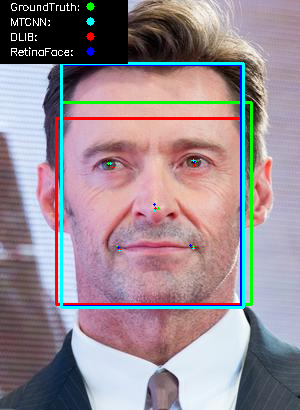

In [43]:
show_face_comparison(22)

In [44]:
def show_face_comparison_viola(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>=24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")

  for face_id in violajones_annotated[id]:
    box = violajones_annotated[id][face_id]
    x = int(box["x"])
    y = int(box["y"])
    w = int(box["w"])
    h = int(box["h"])
    print(x,y,w,h)

    cv2.rectangle(image, (x, y), (x + w, y + h), (100, 255, 255), 2)
  cv2_imshow(image)




In [45]:
print(violajones_annotated)

{'14': {'0': {'x': 51.0, 'y': 86.0, 'w': 202.0, 'h': 202.0}}, '16': {'0': {'x': 48.0, 'y': 84.0, 'w': 213.0, 'h': 213.0}}, '31': {'0': {'x': 47.0, 'y': 81.0, 'w': 193.0, 'h': 193.0}}, '26': {'0': {'x': 84.0, 'y': 114.0, 'w': 154.0, 'h': 154.0}}, '32': {'0': {'x': 38.0, 'y': 75.0, 'w': 178.0, 'h': 178.0}}, '23': {'0': {'x': 31.0, 'y': 80.0, 'w': 220.0, 'h': 220.0}}, '2': {'0': {'x': 32.0, 'y': 85.0, 'w': 195.0, 'h': 195.0}}, '28': {'0': {'x': 65.0, 'y': 74.0, 'w': 215.0, 'h': 215.0}}, '39': {'0': {'x': 43.0, 'y': 64.0, 'w': 182.0, 'h': 182.0}}, '33': {'0': {'x': 62.0, 'y': 81.0, 'w': 163.0, 'h': 163.0}}, '11': {'0': {'x': 47.0, 'y': 94.0, 'w': 229.0, 'h': 229.0}}, '15': {'0': {'x': 37.0, 'y': 62.0, 'w': 213.0, 'h': 213.0}}, '12': {'0': {'x': 36.0, 'y': 87.0, 'w': 223.0, 'h': 223.0}}, '27': {'0': {'x': 68.0, 'y': 85.0, 'w': 162.0, 'h': 162.0}}, '4': {'0': {'x': 98.0, 'y': 53.0, 'w': 125.0, 'h': 125.0}}, '8': {'0': {'x': 42.0, 'y': 56.0, 'w': 249.0, 'h': 249.0}}, '36': {'0': {'x': 47.0, '

42 56 249 249


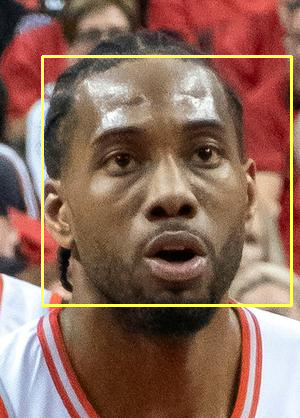

In [46]:
show_face_comparison_viola(8)

In [47]:
dlib_diff = compare(faces_annotated,dlib_annotated)
print(dlib_diff)

{'0': {'left_eye_distance': 3.8587349571131115, 'right_eye_distance': 1.3410986320224545, 'nose_distance': 4.612630462371799, 'left_mouth_distance': 4.914528064456143, 'right_mouth_distance': 2.9644223033913284}, '1': {'left_eye_distance': 4.848522524630823, 'right_eye_distance': 1.1866262604429432, 'nose_distance': 1.5067605344845183, 'left_mouth_distance': 8.587424281860411, 'right_mouth_distance': 2.150978688870533}, '2': {'left_eye_distance': 7.411640060954616, 'right_eye_distance': 5.781660525698804, 'nose_distance': 4.606827277653059, 'left_mouth_distance': 6.154627759174968, 'right_mouth_distance': 6.008997683403083}, '3': {'left_eye_distance': 3.6290303239012083, 'right_eye_distance': 1.3363620838180228, 'nose_distance': 2.3736424617792684, 'left_mouth_distance': 5.996050570926916, 'right_mouth_distance': 8.003897560318451}, '4': {'left_eye_distance': 8.219241739533478, 'right_eye_distance': 6.616811392655801, 'nose_distance': 3.514360597142272, 'left_mouth_distance': 7.1651805

In [48]:
print(dlib_diff)

{'0': {'left_eye_distance': 3.8587349571131115, 'right_eye_distance': 1.3410986320224545, 'nose_distance': 4.612630462371799, 'left_mouth_distance': 4.914528064456143, 'right_mouth_distance': 2.9644223033913284}, '1': {'left_eye_distance': 4.848522524630823, 'right_eye_distance': 1.1866262604429432, 'nose_distance': 1.5067605344845183, 'left_mouth_distance': 8.587424281860411, 'right_mouth_distance': 2.150978688870533}, '2': {'left_eye_distance': 7.411640060954616, 'right_eye_distance': 5.781660525698804, 'nose_distance': 4.606827277653059, 'left_mouth_distance': 6.154627759174968, 'right_mouth_distance': 6.008997683403083}, '3': {'left_eye_distance': 3.6290303239012083, 'right_eye_distance': 1.3363620838180228, 'nose_distance': 2.3736424617792684, 'left_mouth_distance': 5.996050570926916, 'right_mouth_distance': 8.003897560318451}, '4': {'left_eye_distance': 8.219241739533478, 'right_eye_distance': 6.616811392655801, 'nose_distance': 3.514360597142272, 'left_mouth_distance': 7.1651805

In [49]:
import numpy as np

def count_diff(algorithm,threshold):
  # bucket_left_eye = {}
  # bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100]
  l_m={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  l={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  l_r={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  m_count = 0
  r_count = 0
  for id in algorithm:
    face = (algorithm[id])
    for feature in face:
      value = face[feature]
      if value >= threshold:
        l[feature].append(value)
        id = int(id)
        if (id>=0 and id<12 or id>=24 and id<36):
          m_count += 1
          l_m[feature].append(value)
          
        else:
          r_count += 1
          l_r[feature].append(value)
      # else:
      #   continue:
      #    #print(id, value, feature)
          
  return m_count,r_count,l_m,l_r,l



      

In [125]:
miniority_count, represented_count,dlib_error_list_m,dlib_error_list_r,dlib_error_list = count_diff(dlib_diff,0)
print("DLIB",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,mtcnn_error_list_m,mtcnn_error_list_r,mtcnn_error_list = count_diff(mtcnn_diff,0)
print("MTCNN",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,retinaface_error_list_m,retinaface_error_list_r,retinaface_error_list = count_diff(retinaface_diff,0)
print("RetinaFace",miniority_count, represented_count,miniority_count-represented_count)

DLIB 120 120 0
MTCNN 120 120 0
RetinaFace 120 120 0


{'left_eye_distance': [3.8587349571131115, 4.848522524630823, 7.411640060954616, 3.6290303239012083, 8.219241739533478, 4.103616874196811, 1.5547577891016326, 3.9138161293423663, 4.713357079035253, 3.0385409669831502, 6.833455288666344, 5.633932357551353, 5.9327860348153765, 7.45356153541086, 5.894793180126935, 7.957134845467284, 5.126218040330962, 3.078007393581181, 2.314185520384164, 2.9689873608561514, 5.3021086296739774, 6.831480872394473, 4.1541409550964135, 7.345924863736718], 'right_eye_distance': [1.3410986320224545, 1.1866262604429432, 5.781660525698804, 1.3363620838180228, 6.616811392655801, 2.740453040676836, 2.3424944508541254, 1.4626041508907612, 5.065026606600801, 5.421252246883999, 4.660758716379869, 3.9302751400407407, 4.169596062060732, 5.046112608261543, 8.883293871170135, 5.60201136300692, 7.084152531114858, 4.248445077812122, 5.3747976654402905, 4.528204377792789, 6.957359848232982, 2.131832748011636, 3.677048187451526, 4.4276846435964865], 'nose_distance': [4.61263

In [51]:
# def histogram(listforfeature):
#   bins = [0,1,2,3,4,5,6,7,8,9,10]
#   temp = {}
#   for x in bins:
#     temp[x]=0
#   temp[11] = 0
#   #print(dict_hist)
#   for x in listforfeature:
#     if x>10:
#       temp[11]+=1
#     else:
#       x = int(x)+1
#       temp[x]+=1
#   return temp





In [52]:
# dict_hist = histogram(l["right_eye_distance"])

In [53]:
# import matplotlib.pyplot as plt
# xval=[]
# yval=[]
# for x in dict_hist:
  
#   xval.append(x) 
#   yval.append(dict_hist[x])


# plt.title('Histogram of Error difference for left_eye')
# plt.xlabel('Error Difference %')
# plt.ylabel('Frequency')
# plt.bar(xval, yval, color='g')
# plt.xticks(list(dict_hist.keys()),["0","1","2","3","4","5","6","7","8","9","10","10+"])
# plt.show()
# print(dict_hist)

In [54]:
def histogram(listforfeature, nameofhistogram):
  import numpy as np
  import matplotlib.pyplot as plt
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))

  left_eye_distance = (listforfeature["left_eye_distance"])
  right_eye_distance = (listforfeature["right_eye_distance"])
  nose_distance = (listforfeature["nose_distance"])
  left_mouth_distance = (listforfeature["left_mouth_distance"])
  right_mouth_distance = (listforfeature["right_mouth_distance"])

  bins = np.linspace(0, 15, 16)
  #print(bins)

  plt.hist([left_eye_distance,right_eye_distance,nose_distance,left_mouth_distance,right_mouth_distance], bins, label=['left_eye_distance', 'left_eye_distance','nose_distance','left_mouth_distance','right_mouth_distance'])
  plt.xticks(bins)
  plt.yticks(np.linspace(0, 15, 16))
  title = "Histogram of Error difference for " + nameofhistogram
  plt.title(title)
  plt.xlabel('Error Difference %')
  plt.ylabel('Frequency')
  plt.legend(loc='upper right',prop={'size': 28})
  plt.show()

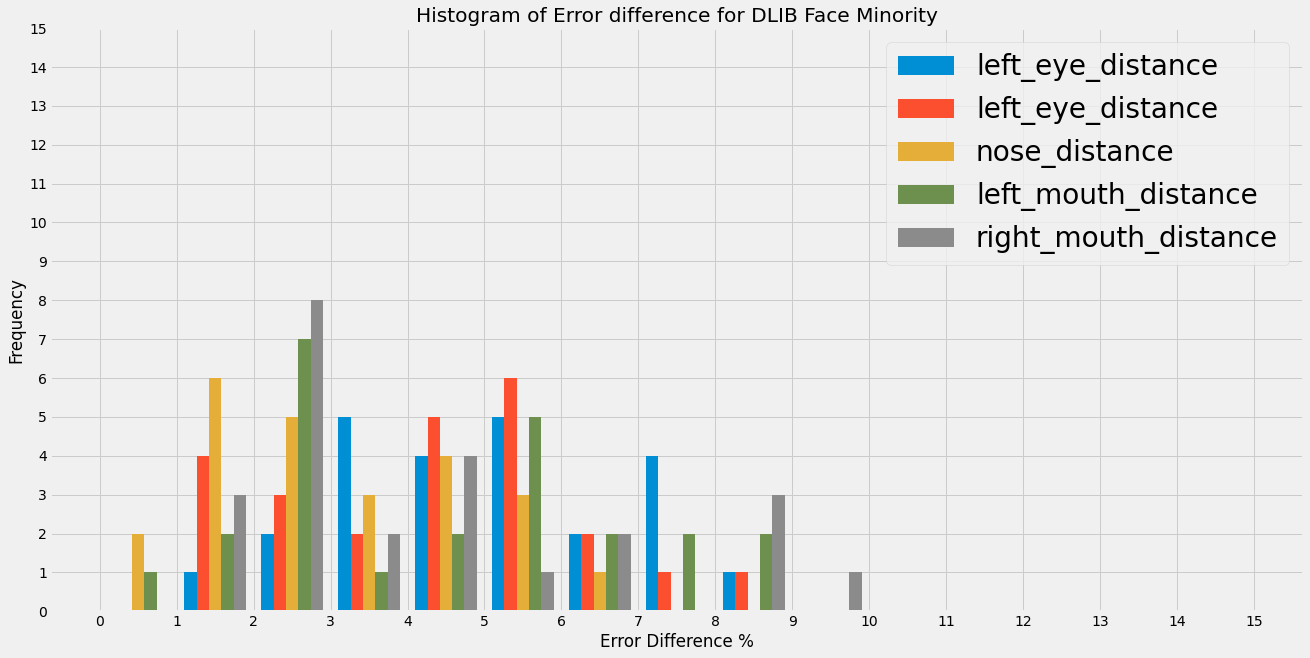

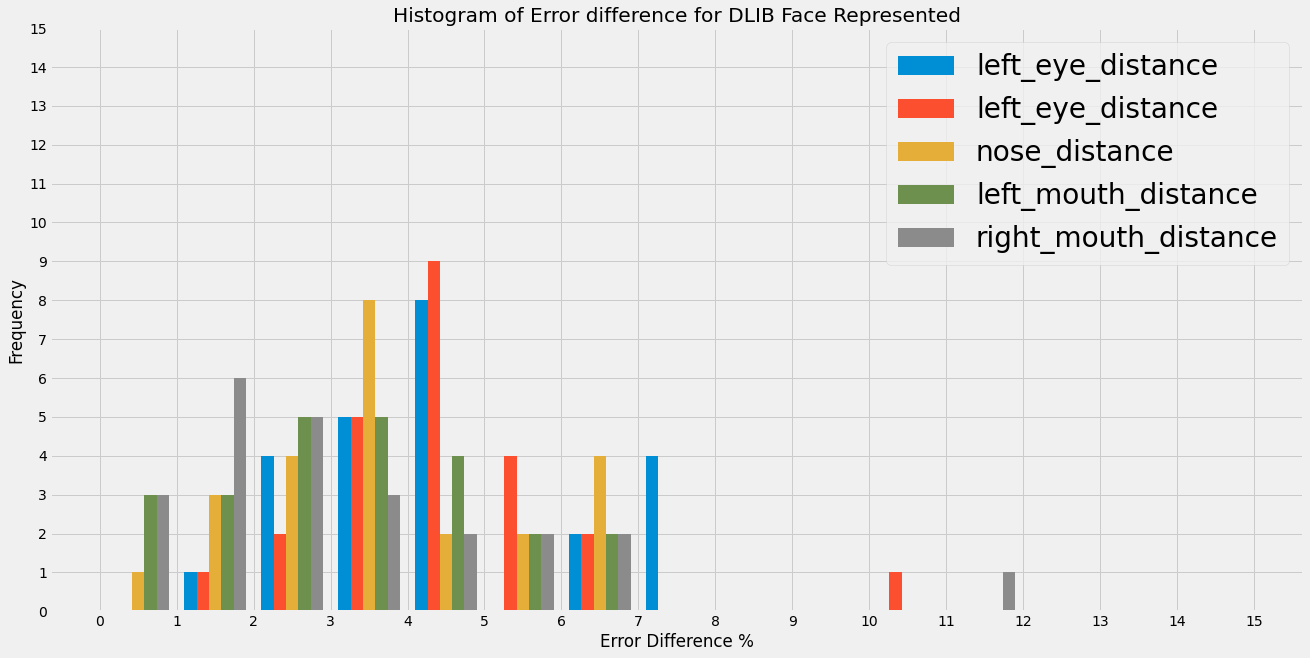

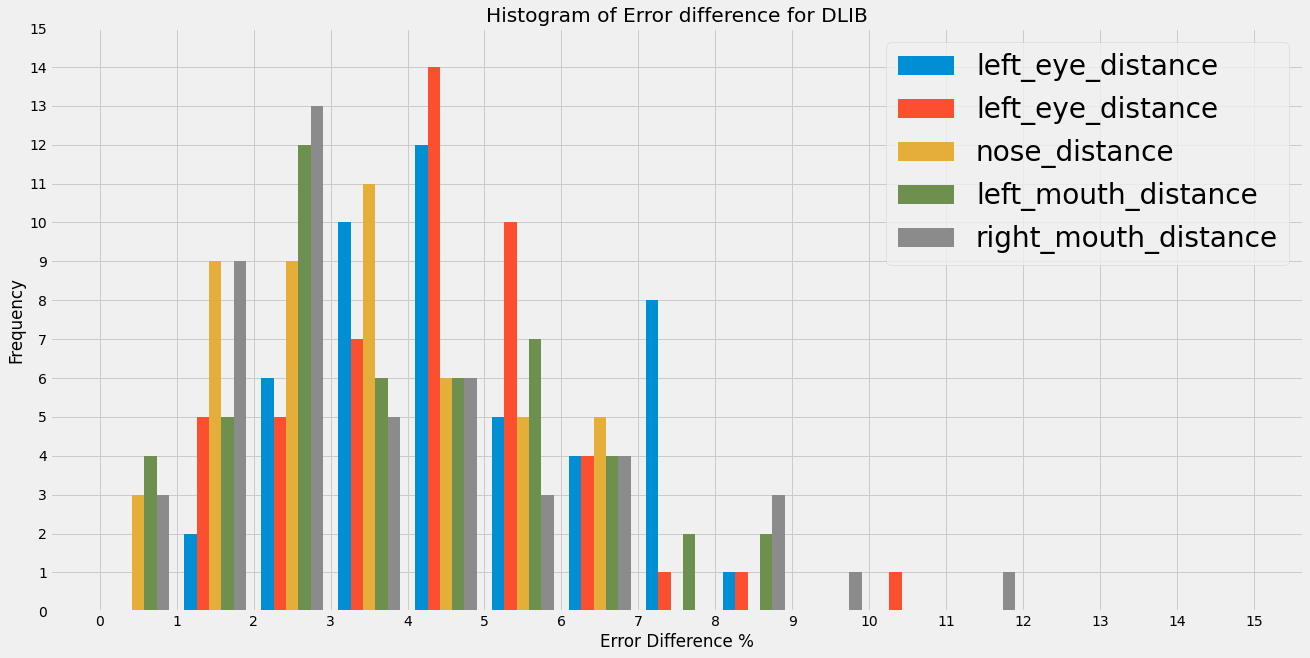

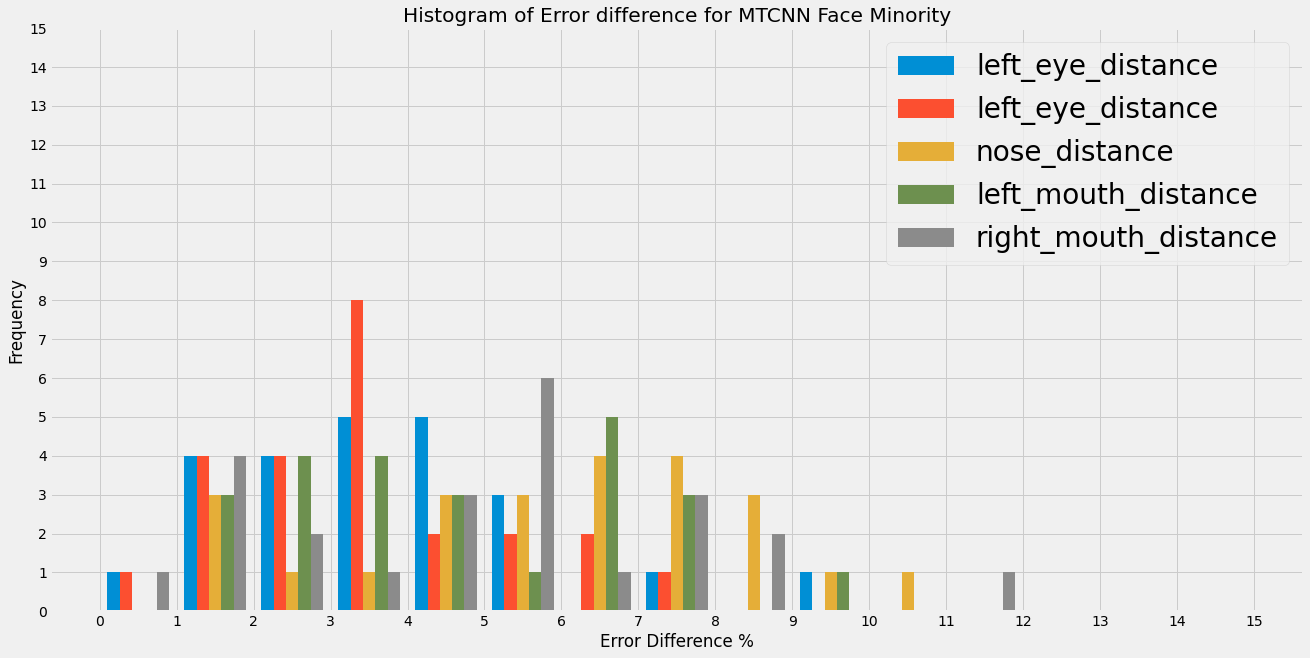

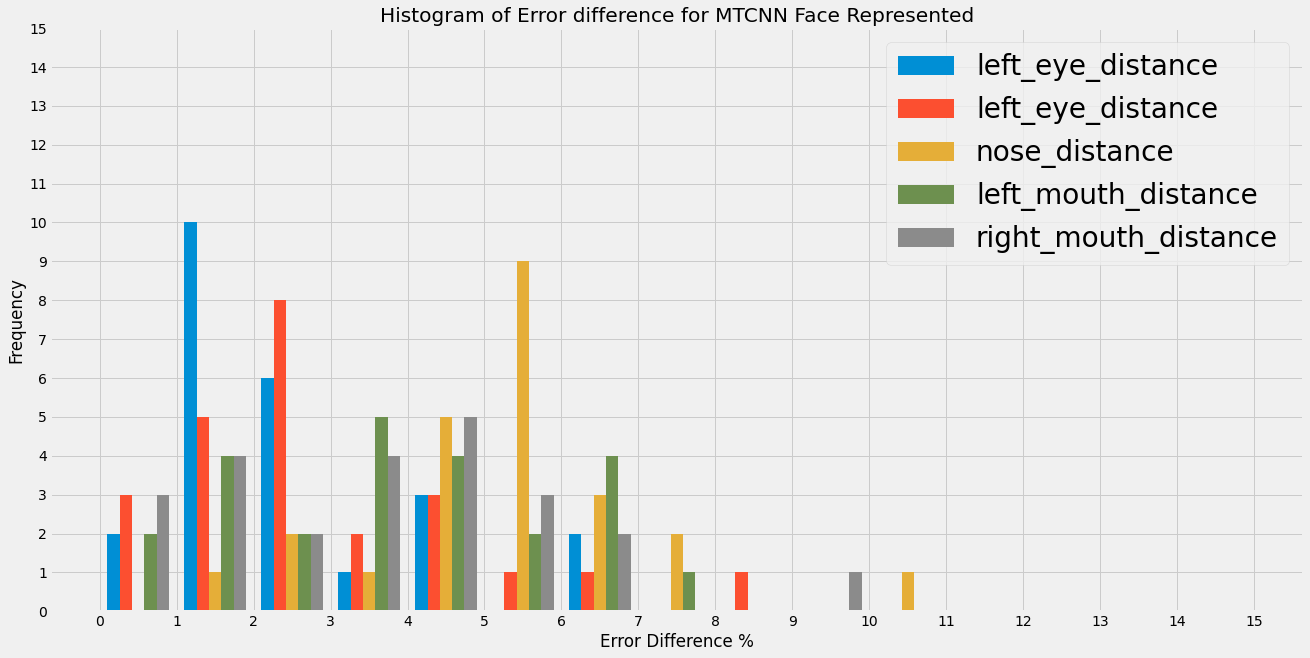

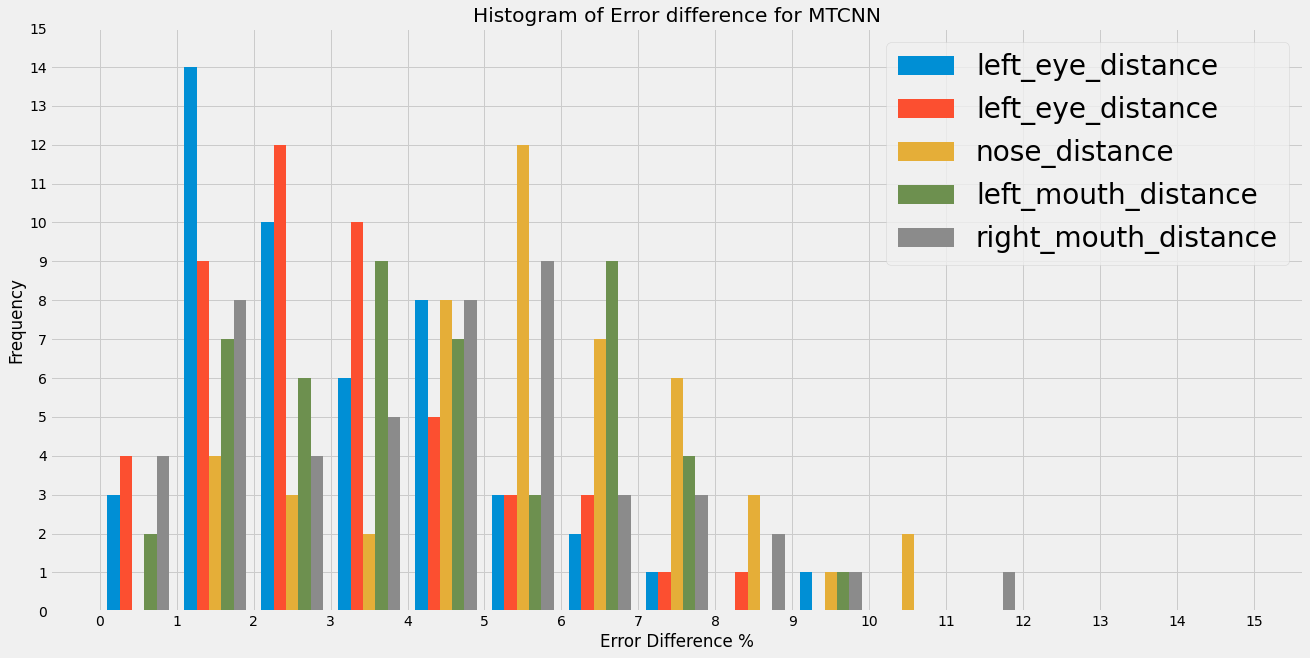

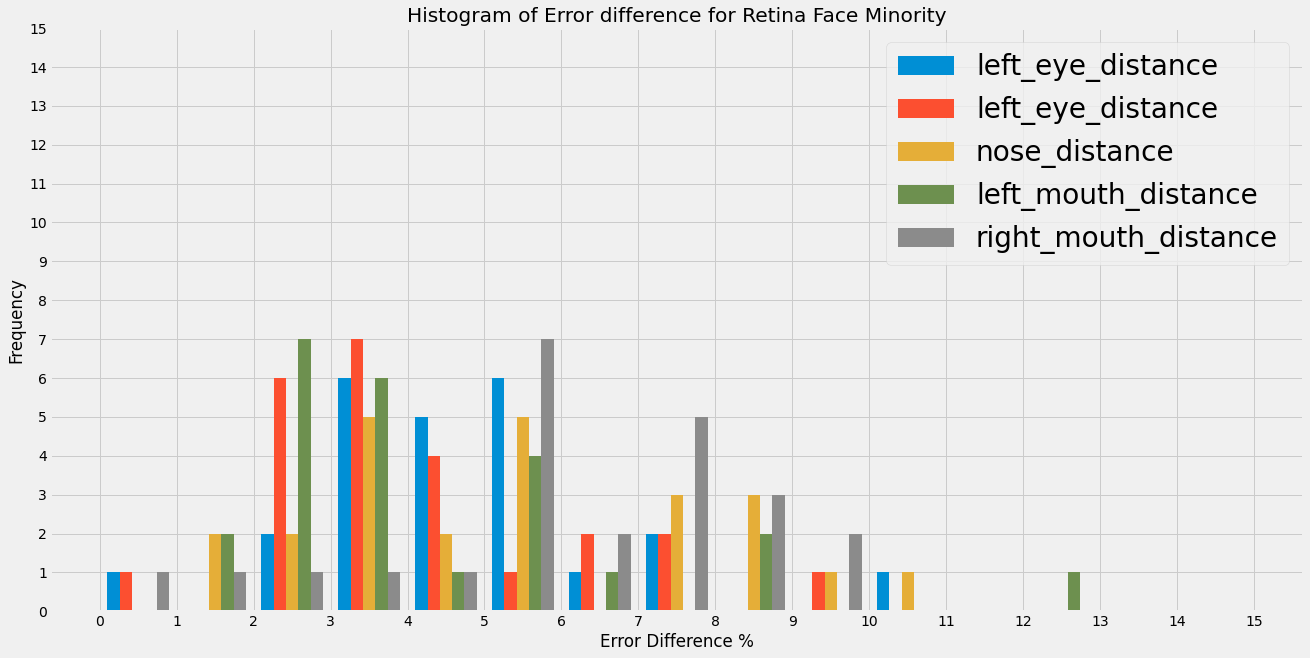

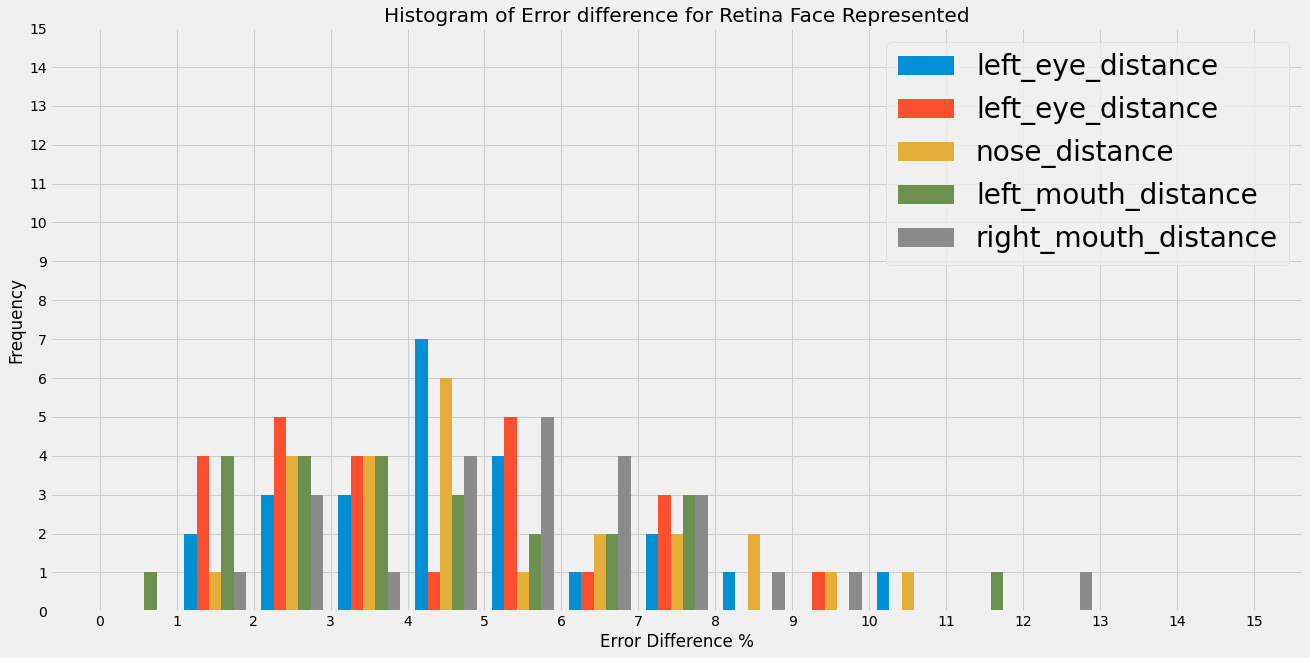

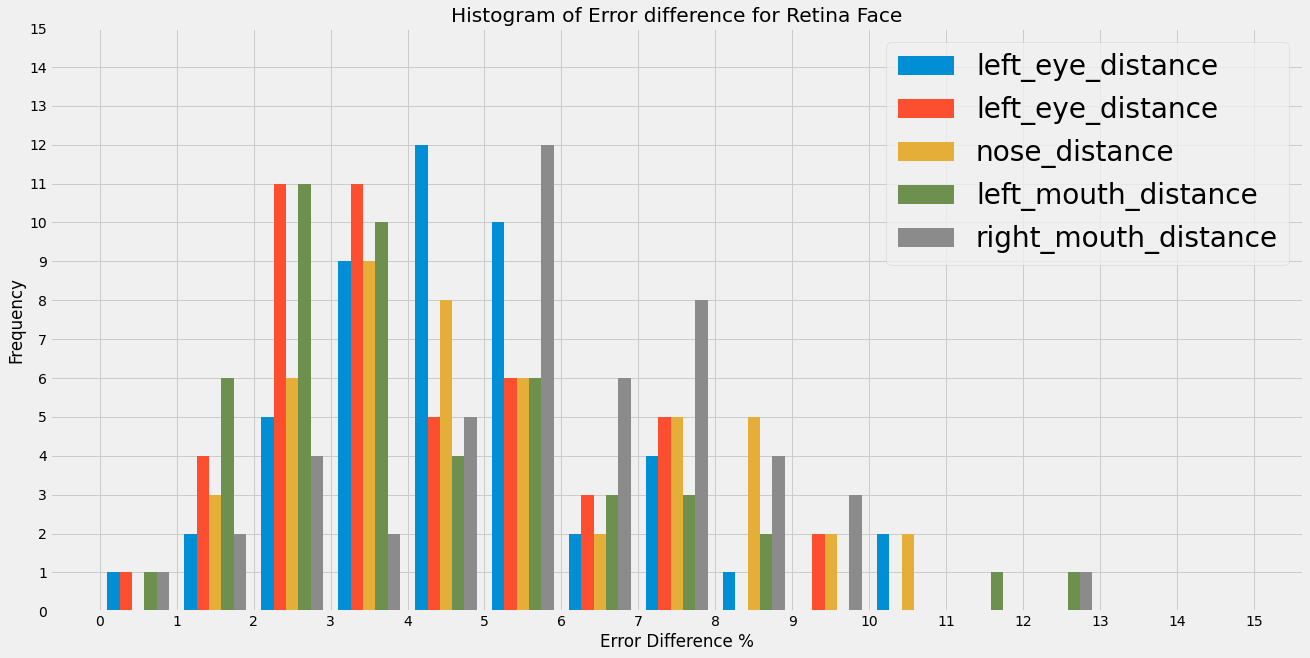

In [55]:
# histogram(mtcnn_error_list,"MTCNN")
# histogram(dlib_error_list,"DLIB")
# histogram(retinaface_error_list,"Retina Face")

histogram(dlib_error_list_m,"DLIB Face Minority")
histogram(dlib_error_list_r,"DLIB Face Represented")
histogram(dlib_error_list,"DLIB")

histogram(mtcnn_error_list_m,"MTCNN Face Minority")
histogram(mtcnn_error_list_r,"MTCNN Face Represented")
histogram(mtcnn_error_list,"MTCNN")

histogram(retinaface_error_list_m,"Retina Face Minority")
histogram(retinaface_error_list_r,"Retina Face Represented")
histogram(retinaface_error_list,"Retina Face")


In [56]:
#plt.plot(min_list, rep_list, 'r')
def errorThreshold(min_list,rep_list,name):
  plt.figure(figsize=(20,10))
  plt.style.use('fivethirtyeight')
  min_plt, = plt.plot( [0,1,2,3,4,5,6,7,8,9,10], min_list,color='g',marker = '*',label = "minority",linewidth = 2)
  rep_plt, = plt.plot([0,1,2,3,4,5,6,7,8,9,10],rep_list,color = 'r' , marker = '*',label= "represented",linewidth = 2)
  plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
  title = "Frequency of errors at different error thresholds for " + name
  plt.title(title)
  plt.xlabel('Error Thresholds')
  plt.ylabel('Number of errors')
  plt.legend(handles = [min_plt,rep_plt] ,loc='upper right',prop={'size': 10})
  plt.show()

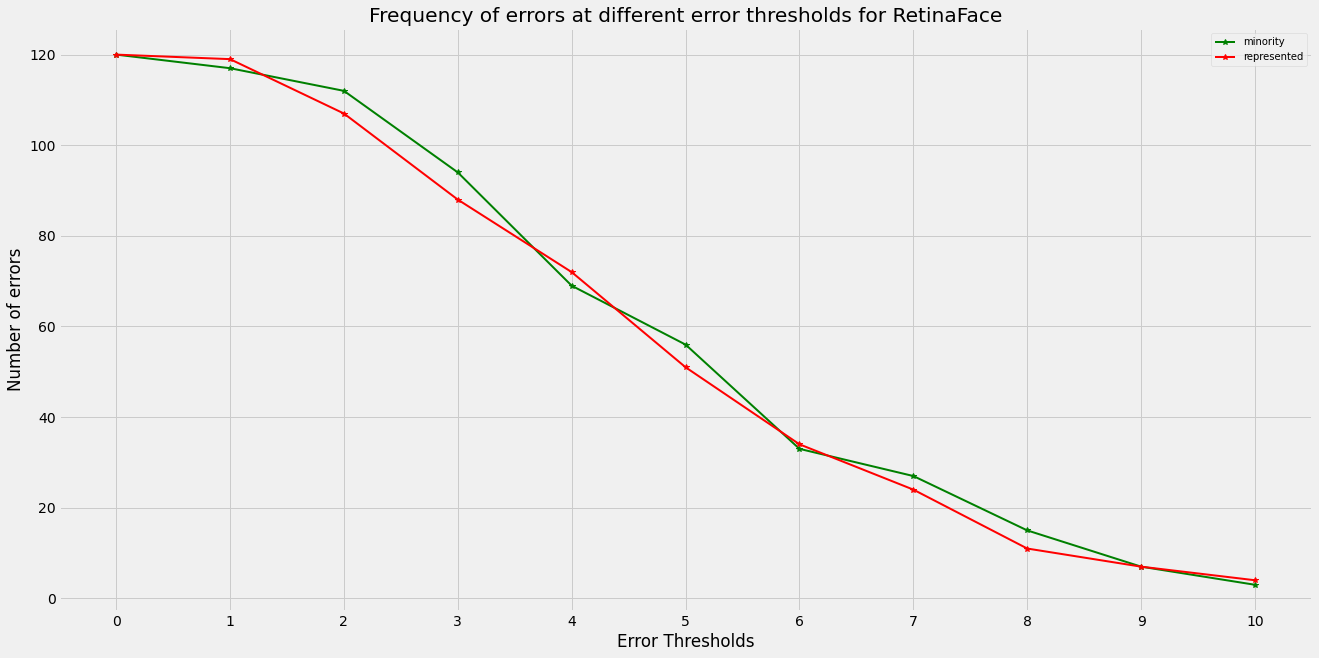

In [124]:
min_list = []
rep_list=[]
for x in range(11):
  #print(x)
  m, r,_,_,_ = count_diff(retinaface_diff,x)
  # print("DLIB",miniority_count, represented_count,miniority_count-represented_count)
  min_list.append(m)
  rep_list.append(r)


errorThreshold(min_list,rep_list,"RetinaFace")

In [126]:
def max_error(algortihm):
  max = 0
  for x in algortihm:
    total =0
    for keys in algortihm[x].values():
      total += (keys)
    total = total/5  #remove this for max error instead of max average
    # print(total)
    if total >max:
      max = total
      id = x
  return id

def min_error(algortihm):
  min = 1000
  for x in algortihm:
    total =0
    for keys in algortihm[x].values():
      total += (keys)
    total = total/5  #remove this for max error instead of max average
    # print(total)
    if total <min:
      min = total
      id = x
  return id


2
6
4
53 83 167 235
35 118 186 186
48 59 172 254
47 73 168 227


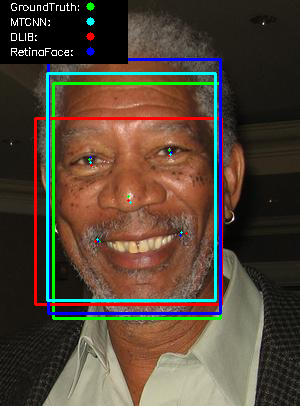

25 86 205 234
35 118 186 186
34 62 196 261
32 52 195 271


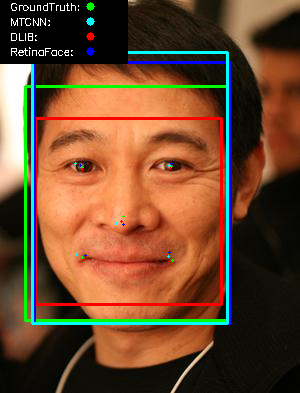

100 56 111 144
96 67 129 129
100 35 108 165
104 38 105 154


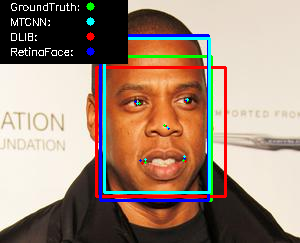

In [127]:
print(max_error(dlib_diff))
print(max_error(mtcnn_diff))
print(max_error(retinaface_diff))
show_face_comparison(2)
show_face_comparison(6)
show_face_comparison(4)

21
16
0
142 79 93 100
145 86 90 90
134 60 99 125
137 63 92 114


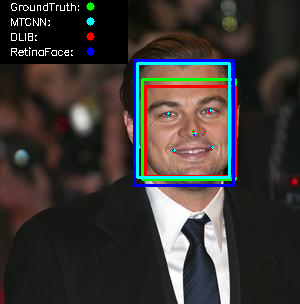

43 100 215 235
56 118 186 186
65 75 179 243
67 78 174 233


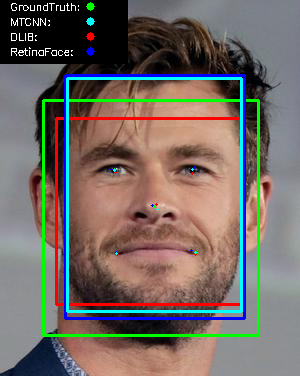

75 49 154 208
81 81 155 155
75 40 150 216
75 49 152 197


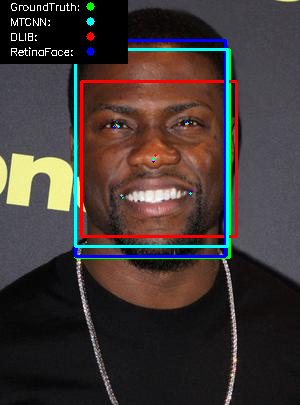

In [128]:
print(min_error(dlib_diff))
print(min_error(mtcnn_diff))
print(min_error(retinaface_diff))
show_face_comparison(21)
show_face_comparison(16)
show_face_comparison(0)

In [129]:
print(violajones_annotated)

{'14': {'0': {'x': 51.0, 'y': 86.0, 'w': 202.0, 'h': 202.0}}, '16': {'0': {'x': 48.0, 'y': 84.0, 'w': 213.0, 'h': 213.0}}, '31': {'0': {'x': 47.0, 'y': 81.0, 'w': 193.0, 'h': 193.0}}, '26': {'0': {'x': 84.0, 'y': 114.0, 'w': 154.0, 'h': 154.0}}, '32': {'0': {'x': 38.0, 'y': 75.0, 'w': 178.0, 'h': 178.0}}, '23': {'0': {'x': 31.0, 'y': 80.0, 'w': 220.0, 'h': 220.0}}, '2': {'0': {'x': 32.0, 'y': 85.0, 'w': 195.0, 'h': 195.0}}, '28': {'0': {'x': 65.0, 'y': 74.0, 'w': 215.0, 'h': 215.0}}, '39': {'0': {'x': 43.0, 'y': 64.0, 'w': 182.0, 'h': 182.0}}, '33': {'0': {'x': 62.0, 'y': 81.0, 'w': 163.0, 'h': 163.0}}, '11': {'0': {'x': 47.0, 'y': 94.0, 'w': 229.0, 'h': 229.0}}, '15': {'0': {'x': 37.0, 'y': 62.0, 'w': 213.0, 'h': 213.0}}, '12': {'0': {'x': 36.0, 'y': 87.0, 'w': 223.0, 'h': 223.0}}, '27': {'0': {'x': 68.0, 'y': 85.0, 'w': 162.0, 'h': 162.0}}, '4': {'0': {'x': 98.0, 'y': 53.0, 'w': 125.0, 'h': 125.0}}, '8': {'0': {'x': 42.0, 'y': 56.0, 'w': 249.0, 'h': 249.0}}, '36': {'0': {'x': 47.0, '

32 85 195 195


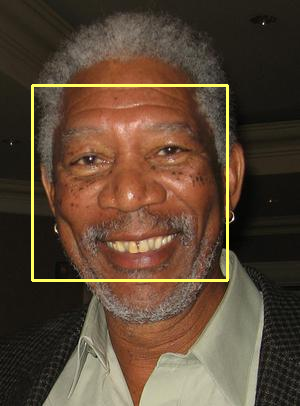

In [130]:
show_face_comparison_viola(2)

In [ ]:

# def area(a, b):  # returns None if rectangles don't intersect

#     a[2] = a[0] + a[2]
#     a[3] = a[1] + a[3]

#     b[2] = b[0] + b[2]
#     b[3] = b[1] + b[3]

#     dx = min(a[2], b[2])-max(a[0], b[0])+1
#     dy = min(a[3], b[3])-max(a[1], b[1])+1
#     # print(dx,dy)
#     # dx = min(a.xmax, b.xmax) - max(a.xmin, b.xmin)
#     # dy = min(a., b.ymax) - max(a.ymin, b.ymin)
#     if (dx>=0) and (dy>=0):
#         return abs(dx*dy)


In [ ]:
# box = (violajones_annotated['0']['0'])
# rect1 = [box["x"],box["y"],box["w"],box["h"]]
# print(rect1)
# box = faces_annotated['0']["bounding_box"]
# print(box)
# rect2 = [box["x"],box["y"],box["w"],box["h"]]
# print(rect2)

In [ ]:
# violajones_overlap = []
# for x in range(48):
#   x=str(x)
#   results = []
#   for y in violajones_annotated[x]:
#     y=str(y)
#     box = (violajones_annotated[x][y])
#     rect1 = [box["x"],box["y"],box["w"],box["h"]]
#     box = faces_annotated[x]["bounding_box"]
#     rect2 = [box["x"],box["y"],box["w"],box["h"]]
    

#     intersectionArea = area(rect1,rect2);
#     if intersectionArea == None:
#       #print(x,"No overlap")
#       results.append(0)
#     else:
#       unionArea = (rect1[2]*rect1[3]) + (rect2[2]*rect2[3]) - intersectionArea;
#       overlap = intersectionArea/unionArea;
#       #print(x,overlap*100)
#       results.append(overlap*100)
#   violajones_overlap.append(max(results))


# print(violajones_overlap)

In [ ]:
# def bounding_box_overlap(algorithm):
#   overlap_result = []
#   for x in range(48):
#     x=str(x)

#     box = faces_annotated[x]["bounding_box"]
#     rect1 = [box["x"],box["y"],box["w"],box["h"]]
#     box = algorithm[x]["bounding_box"]
#     rect2 = [box["x"],box["y"],box["w"],box["h"]]

#     # print(rect1,rect2)
    

#     intersectionArea = area(rect1,rect2);
#     if intersectionArea == None:
#       #print(x,"No overlap")
#       results.append(0)
#       overlap_result.append(0)
#     else:
#       unionArea = (rect1[2]*rect1[3]) + (rect2[2]*rect2[3]) - intersectionArea;
#       overlap = intersectionArea/unionArea;
#       #print(x,overlap*100)
#       # results.append(overlap*100)
#       overlap_result.append(overlap*100)


#   return (overlap_result)

In [ ]:
# dlib_overlap = bounding_box_overlap(dlib_annotated)
# mtcnn_overlap = bounding_box_overlap(mtcnn_annotated)
# retinaface_overlap = bounding_box_overlap(retinanet_annotated)



In [ ]:

# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(20,10))



# bins = np.linspace(0, 100, 26)
# #print(bins)

# plt.hist([violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap], bins,label=["Viola and Jones","DLIB","MTCNN","RetinaFace"])
# # plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
# # plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
# # plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
# # plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
# plt.xticks(bins)
# plt.yticks()
# title = "Algortihm Bounding Boxes overlap with Groundtruth"
# plt.title(title)
# plt.xlabel('Overlapping %')
# plt.ylabel('Frequency')
# plt.legend(loc='upper right',prop={'size': 28})
# plt.show()

154 121 387 387


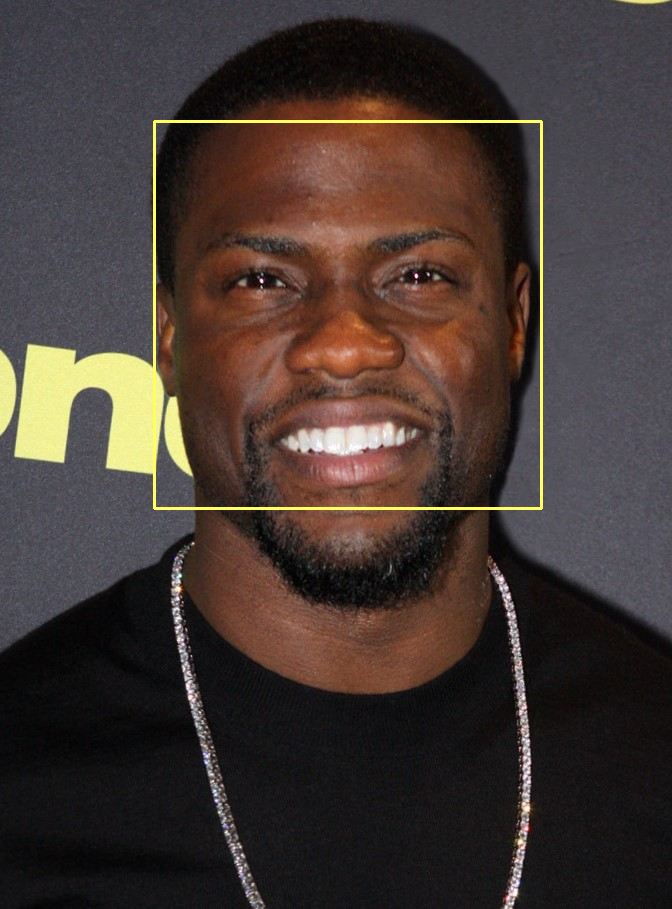

170 110 346 467
161 162 385 385
169 104 340 477
170 126 336 441


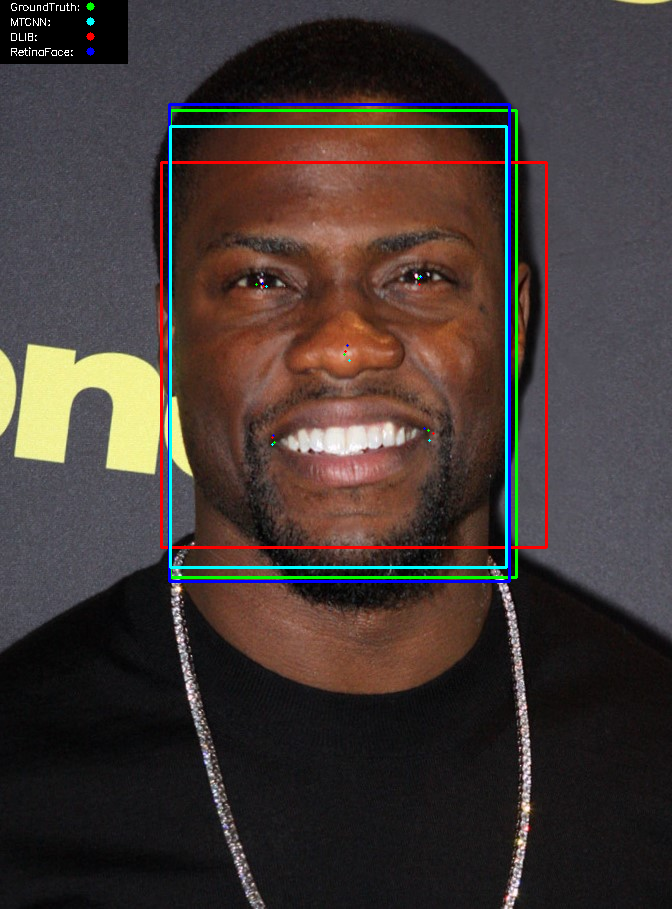

In [ ]:
show_face_comparison_viola(0)
show_face_comparison(0)

In [141]:
   
        # bl = [x,y]
        # br = [x+w,y]
        # tl = [x,y+h]
        # tr = [x+w,y+h]
print(retinaface_diff)

{'0': {'left_eye_distance': 0.49690276808105466, 'right_eye_distance': 3.050999181732657, 'nose_distance': 4.200224778295357, 'left_mouth_distance': 2.600088545063568, 'right_mouth_distance': 1.3453131998133763}, '1': {'left_eye_distance': 5.195665342631097, 'right_eye_distance': 3.673827630601567, 'nose_distance': 5.755119989225667, 'left_mouth_distance': 2.4473724669356134, 'right_mouth_distance': 6.382722585477783}, '2': {'left_eye_distance': 3.5606474868836244, 'right_eye_distance': 2.0092983798068795, 'nose_distance': 7.151258288348935, 'left_mouth_distance': 2.48820518163504, 'right_mouth_distance': 2.9948406115572315}, '3': {'left_eye_distance': 5.121445335421805, 'right_eye_distance': 6.693012555457793, 'nose_distance': 3.0413831496844854, 'left_mouth_distance': 3.1267471263817184, 'right_mouth_distance': 5.1727058438926905}, '4': {'left_eye_distance': 10.299710022306177, 'right_eye_distance': 4.250184384715008, 'nose_distance': 9.028882261864302, 'left_mouth_distance': 12.4853

In [150]:
for x in retinaface_diff:
  if (retinaface_diff[str(x)]["nose_distance"]) >11:
    print(x)

69 108 159 182
56 118 186 186
68 76 168 226
74 85 163 210


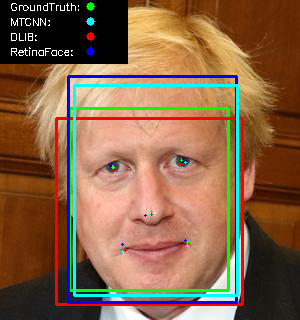

In [152]:
# bb_intersection_over_union([1,1,2,3],[2,1,3,2])
show_face_comparison(14)

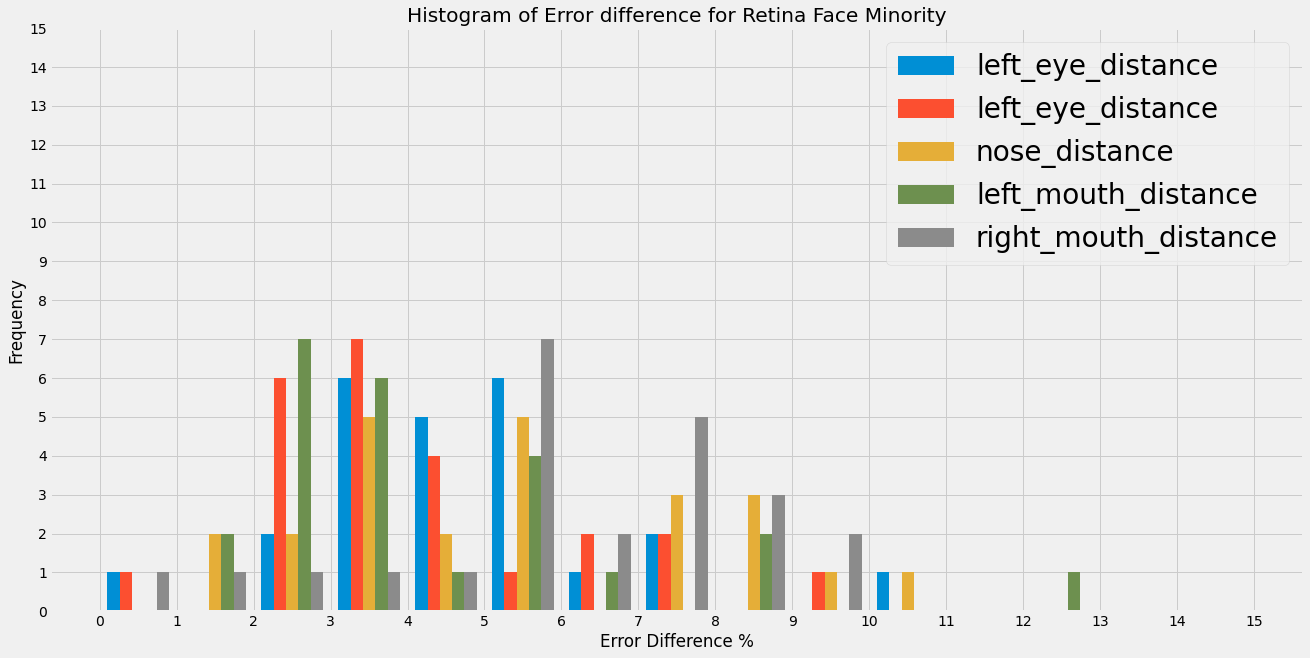

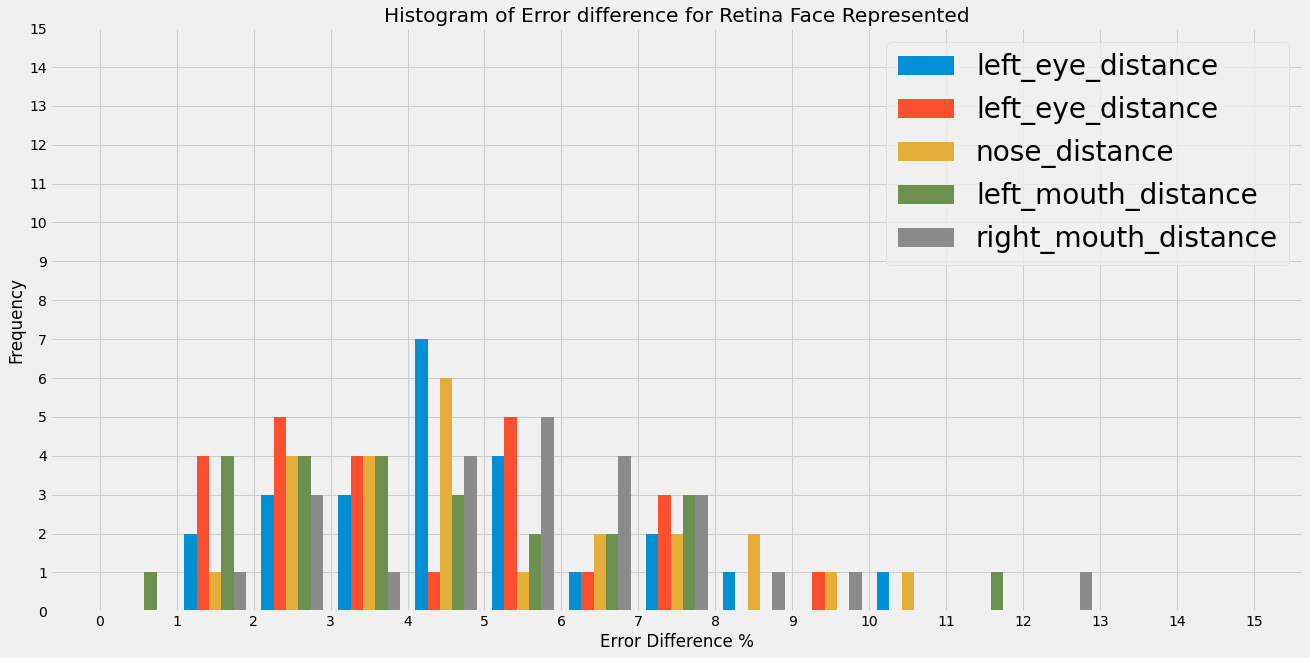

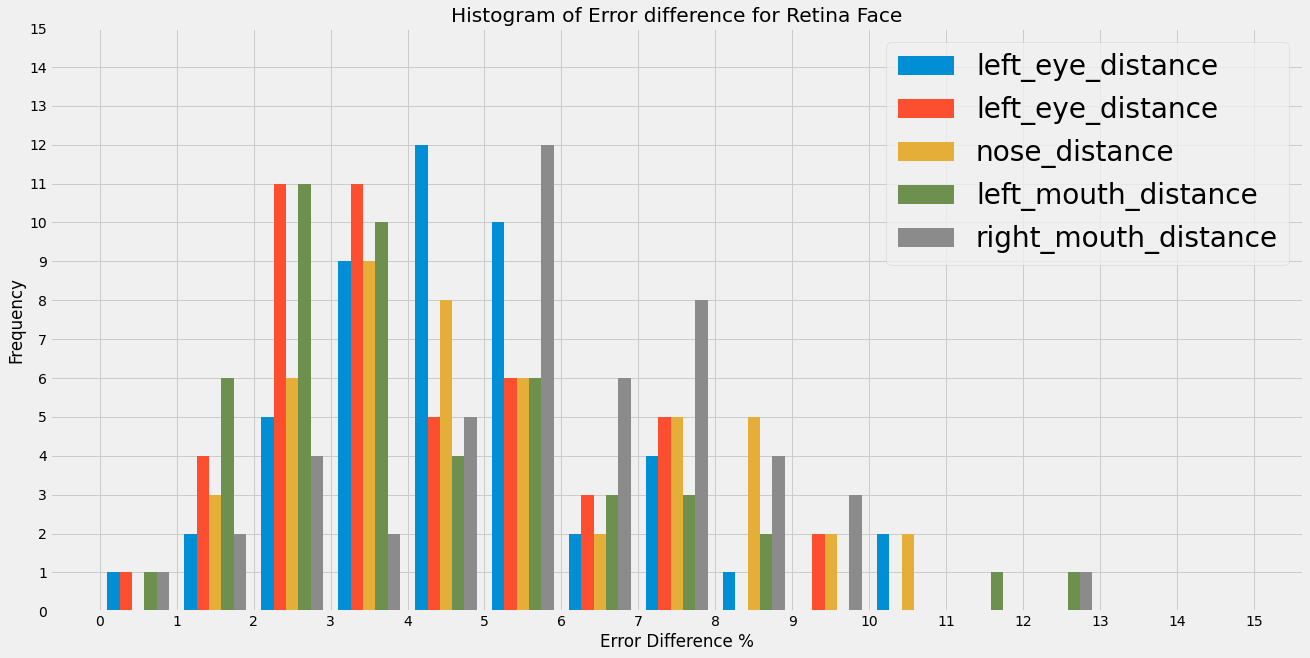

In [71]:

histogram(retinaface_error_list_m,"Retina Face Minority")
histogram(retinaface_error_list_r,"Retina Face Represented")
histogram(retinaface_error_list,"Retina Face")


In [72]:
print(retinaface_error_list_m)
print(dlib_error_list_m)

{'left_eye_distance': [0.49690276808105466, 5.195665342631097, 3.5606474868836244, 5.121445335421805, 10.299710022306177, 3.563043747015409, 4.195347818213834, 3.4263894586662604, 2.1251062020062115, 7.3065362419021, 5.110627105770332, 3.0635453819672196, 2.9272698106228825, 5.938472330803135, 6.242242886992949, 3.871663749218506, 4.077207468328179, 4.510605303418013, 7.145469572622167, 5.52536095242817, 4.211113739256856, 3.0050928389389115, 5.0362386183482455, 4.268387623782645], 'right_eye_distance': [3.050999181732657, 3.673827630601567, 2.0092983798068795, 6.693012555457793, 4.250184384715008, 2.43307843344267, 4.26524191497472, 7.369120226721766, 3.5969494377048763, 6.817259665462781, 3.1127901181302398, 4.200246917399889, 2.807540839767909, 5.442147882885203, 9.863128858409427, 2.879731208287148, 2.1516622606837608, 3.8572713654300053, 7.641948956602733, 2.10615580524637, 4.9816373258042566, 0.7086299395715789, 3.2851376342534975, 3.8612568458147507], 'nose_distance': [4.2002247

In [153]:
def histogramSpecific(feature, nameofhistogram, error_list_m,error_list_r):
  import numpy as np
  import matplotlib.pyplot as plt
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))

  # left_eye_distance = (listforfeature["left_eye_distance"])
  # right_eye_distance = (listforfeature["right_eye_distance"])
  # nose_distance = (listforfeature["nose_distance"])
  # left_mouth_distance = (listforfeature["left_mouth_distance"])
  # right_mouth_distance = (listforfeature["right_mouth_distance"])

  m = error_list_m[feature]
  r = error_list_r[feature]

  # # retinaface_left_eye_m = []
  # # retinaface_left_eye_r = []

  # dlib_left_eye_m = dlib_error_list_m[feature]
  # dlib_left_eye_r = dlib_error_list_r[feature]

  # mtcnn_left_eye_m = mtcnn_error_list_m[feature]
  # mtcnn_left_eye_r = mtcnn_error_list_r[feature]

  # # mtcnn_left_eye_m = []
  # # mtcnn_left_eye_r = []

  # left_eye_m = retinaface_left_eye_m + dlib_left_eye_m + mtcnn_left_eye_m
  # left_eye_r = retinaface_left_eye_r + dlib_left_eye_r + mtcnn_left_eye_r
  bins = np.linspace(0, 14, 8)
  # #print(bins)
  
  name = feature.split("_")[0]
  if name != "nose":
    name = name + feature.split("_")[1]
  plt.hist([m,r], bins,label=[name+ "minority",name+"represented"])

  # plt.hist([left_eye_m], bins,label=[name + "minority"],alpha = 0.5)
  # plt.hist([left_eye_r], bins,label=[name + "represented"],alpha = 0.5)

  plt.xticks(bins)
  plt.yticks(np.linspace(0, 15,16))
  title = "Histogram of Error difference for "+nameofhistogram 
  plt.title(title)
  plt.xlabel('Error Difference %')
  plt.ylabel('Frequency')
  plt.legend(loc='upper right',prop={'size': 28})
  plt.show()

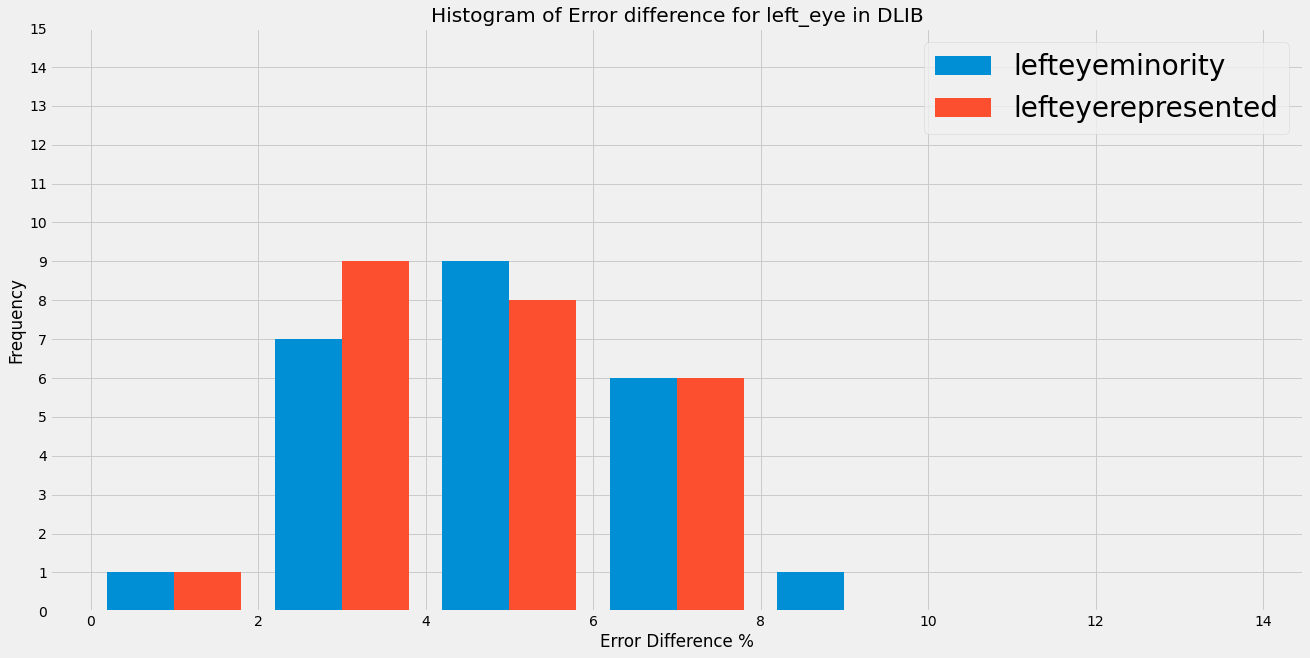

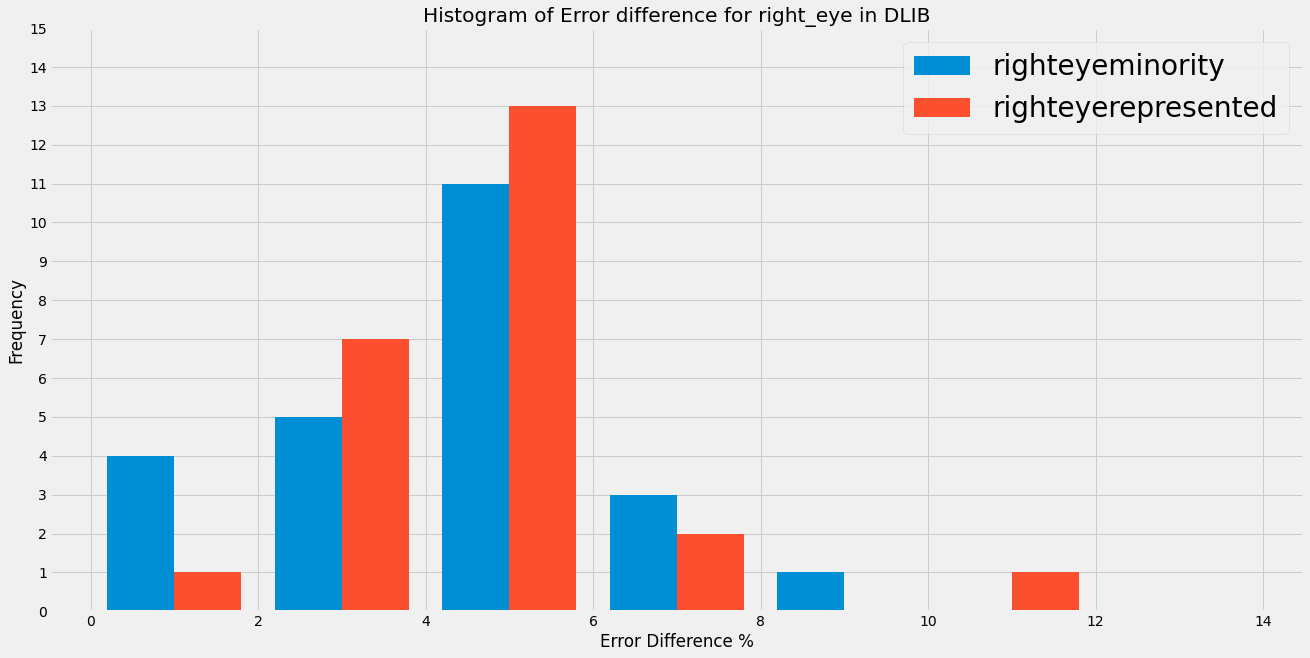

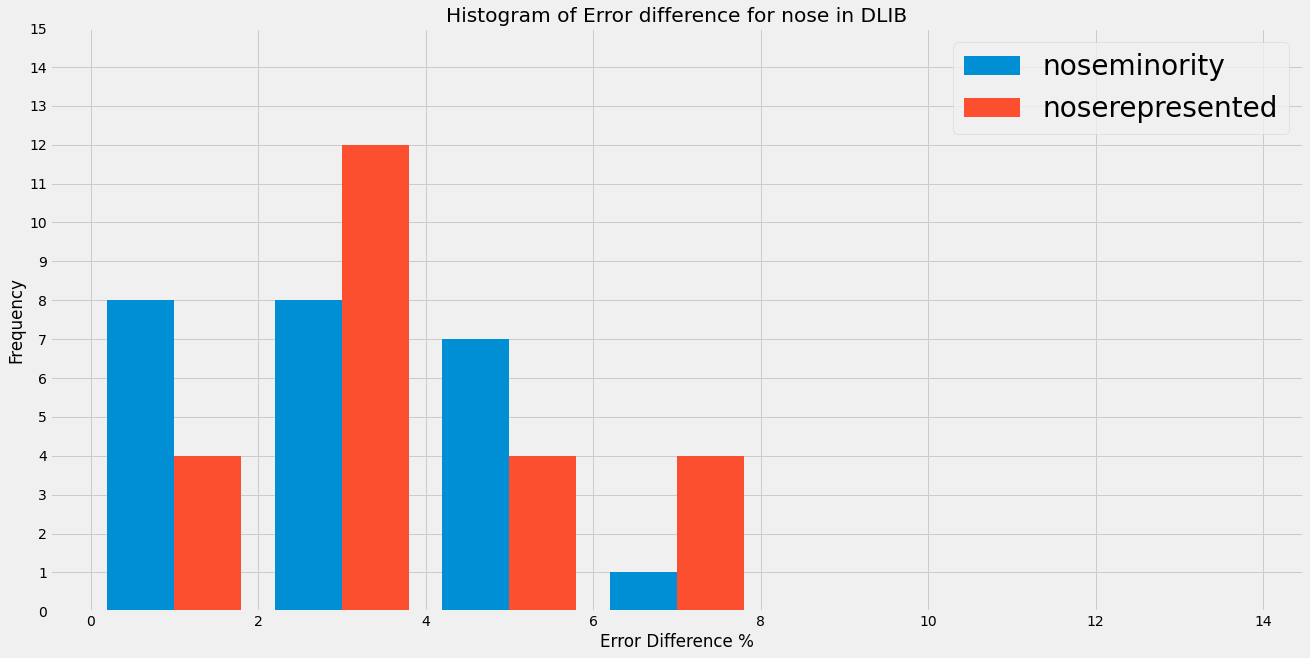

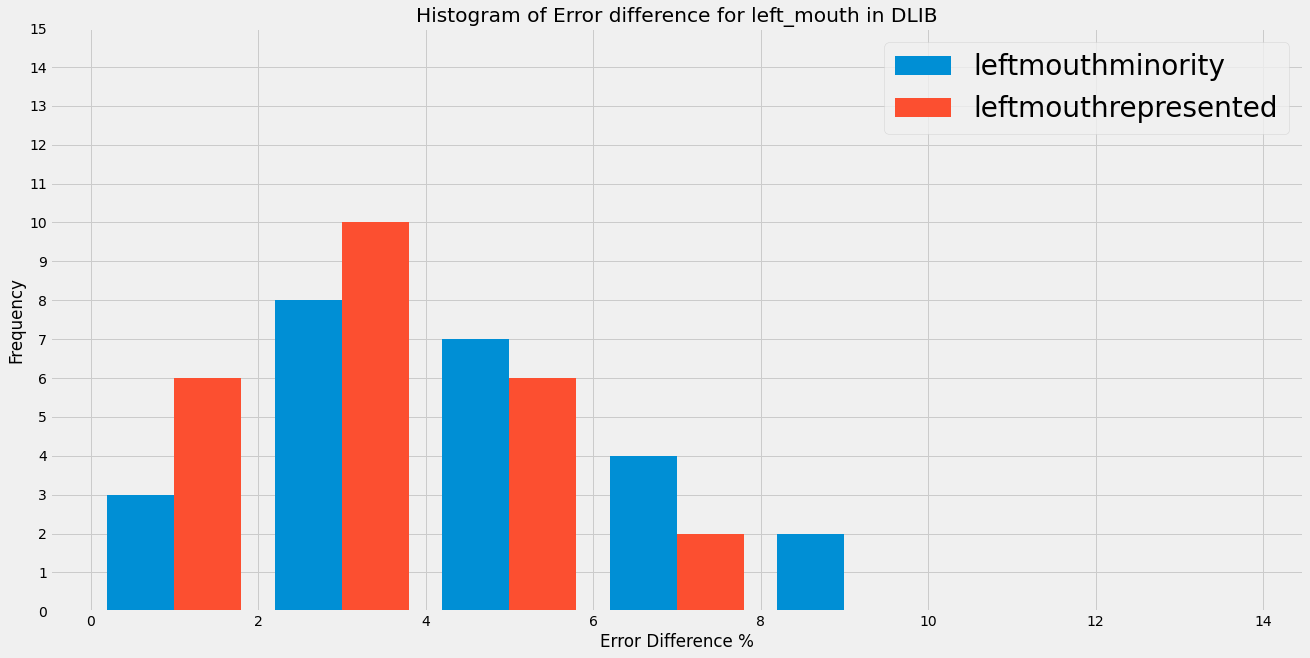

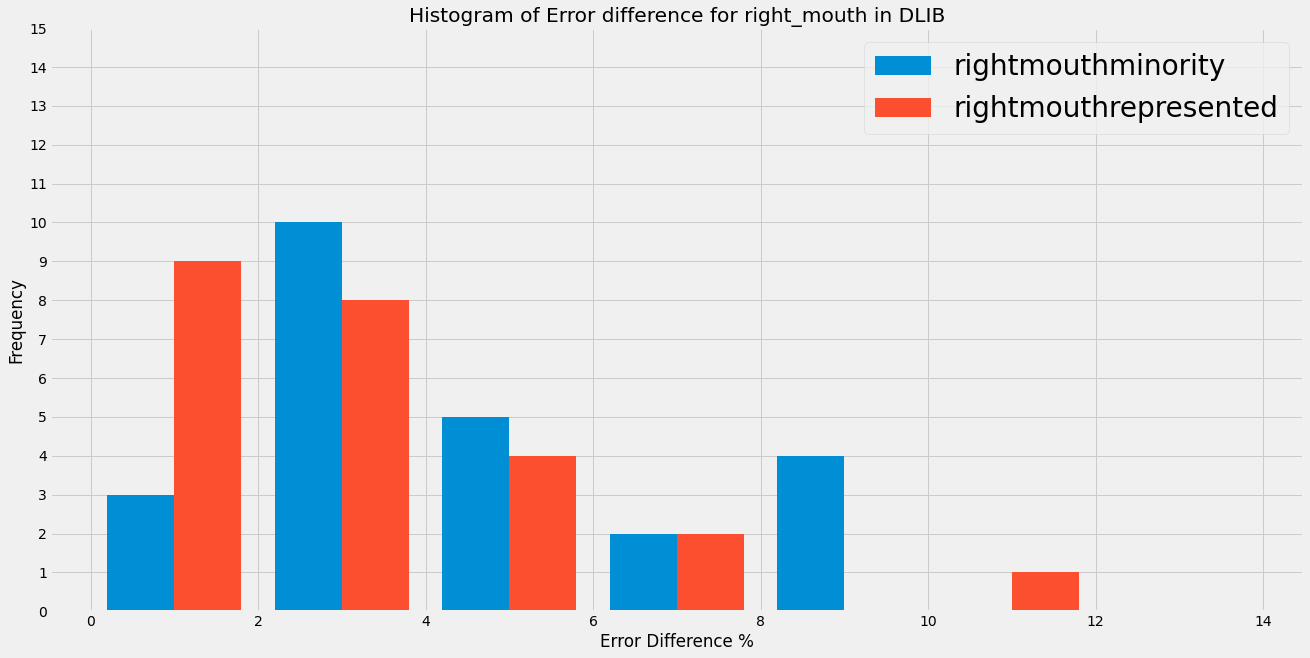

In [154]:
histogramSpecific("left_eye_distance","left_eye in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("right_eye_distance","right_eye in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("nose_distance","nose in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in DLIB",dlib_error_list_m,dlib_error_list_r)

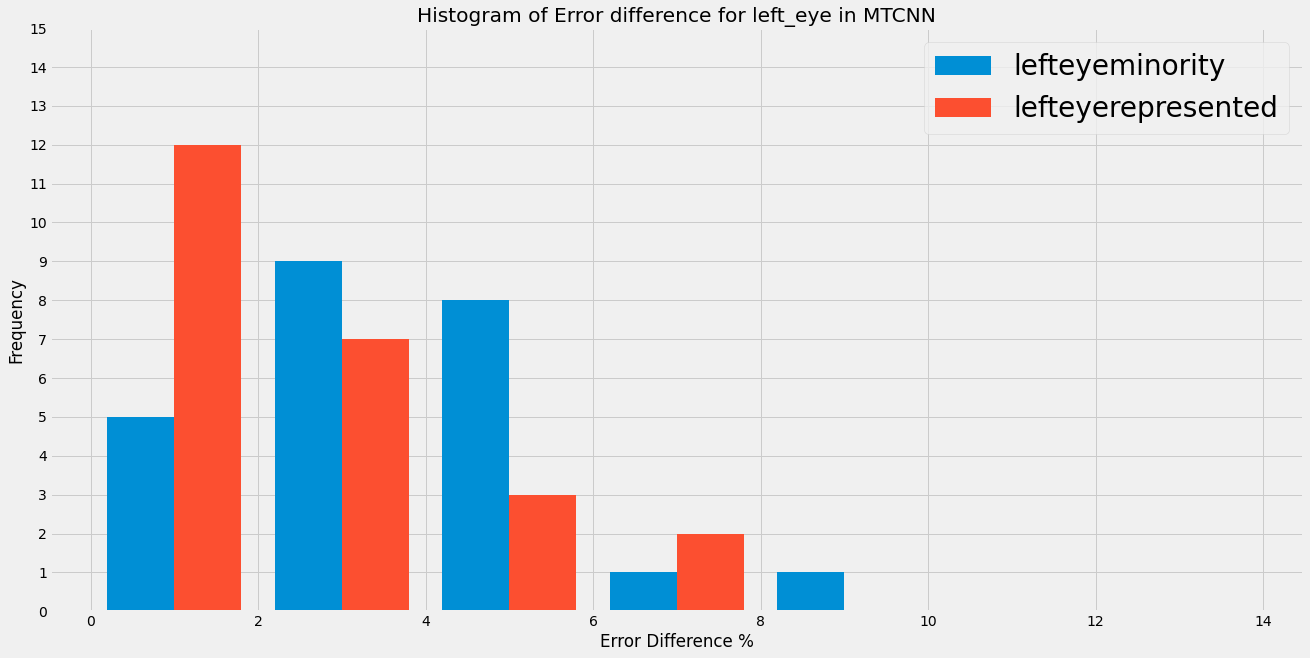

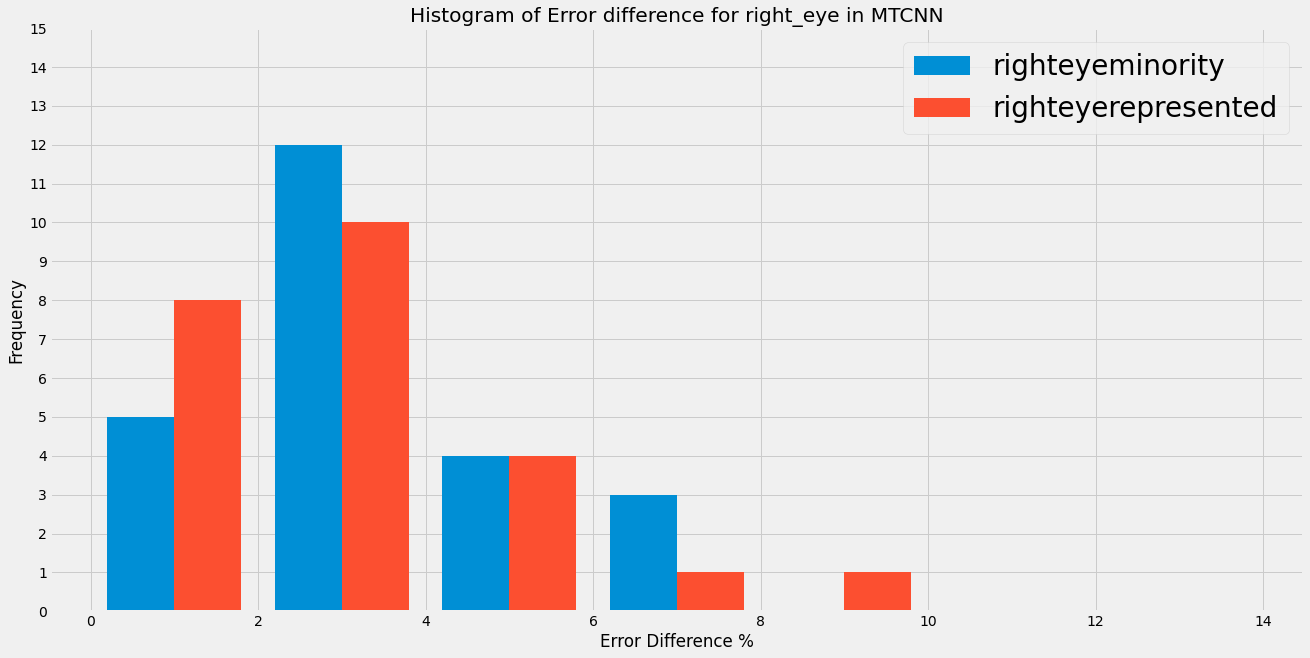

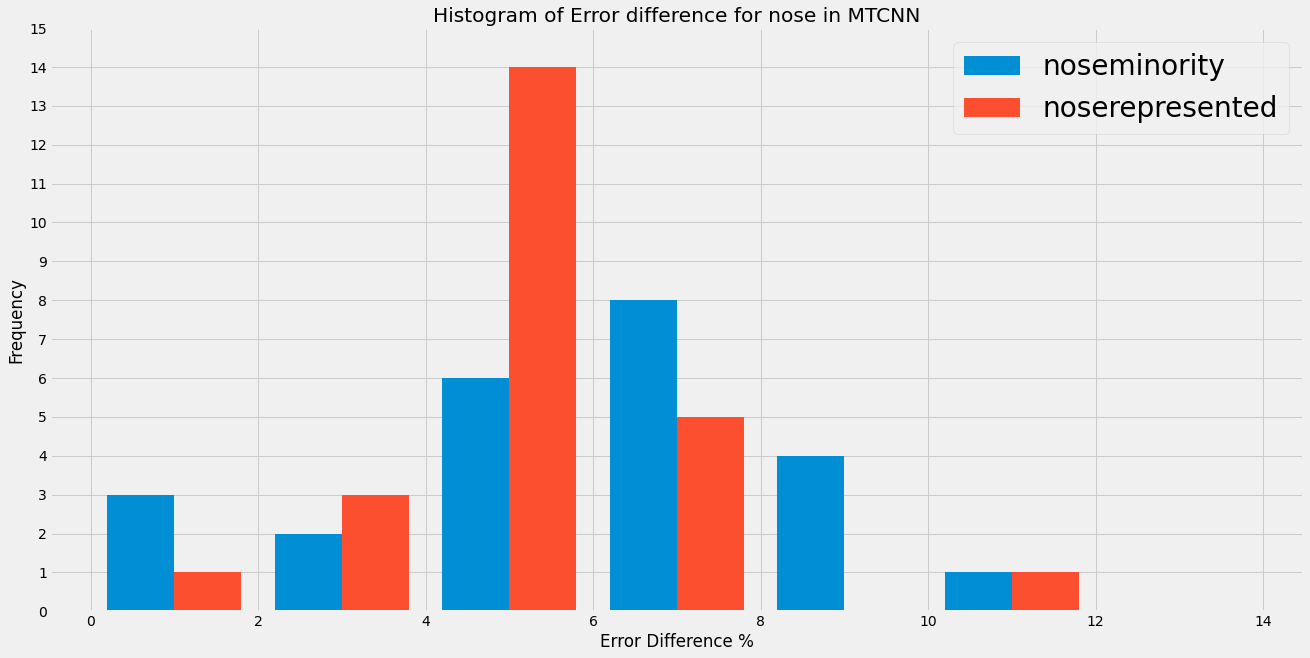

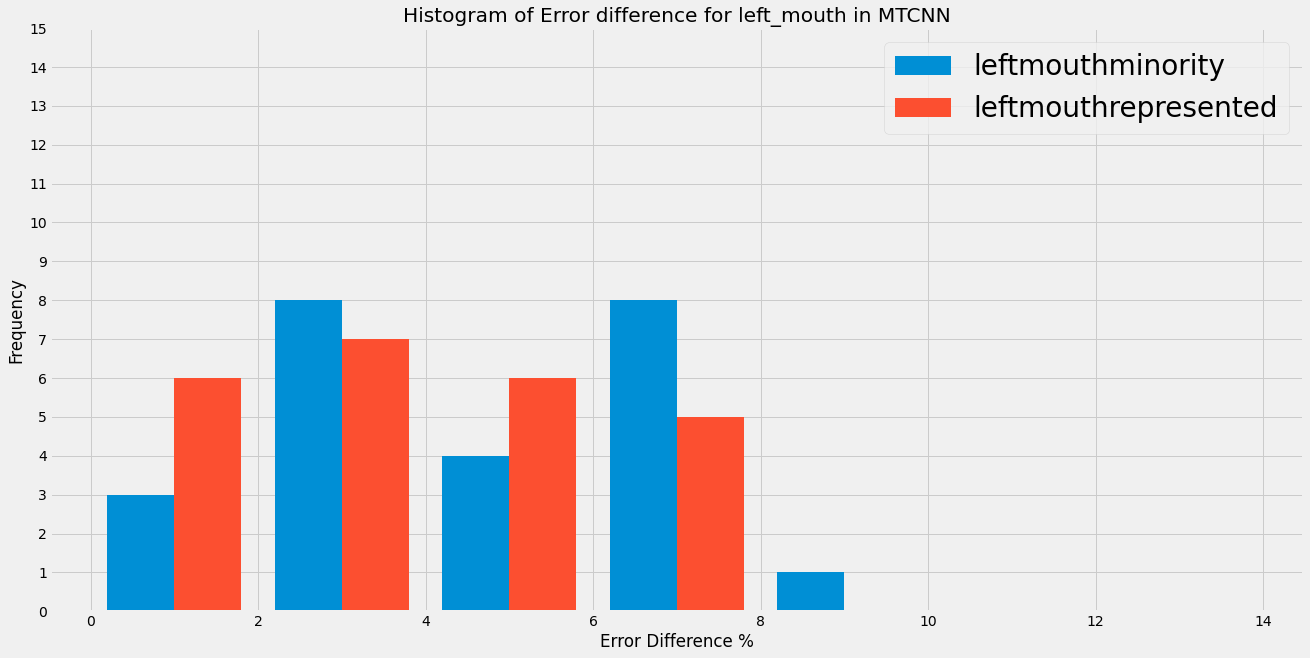

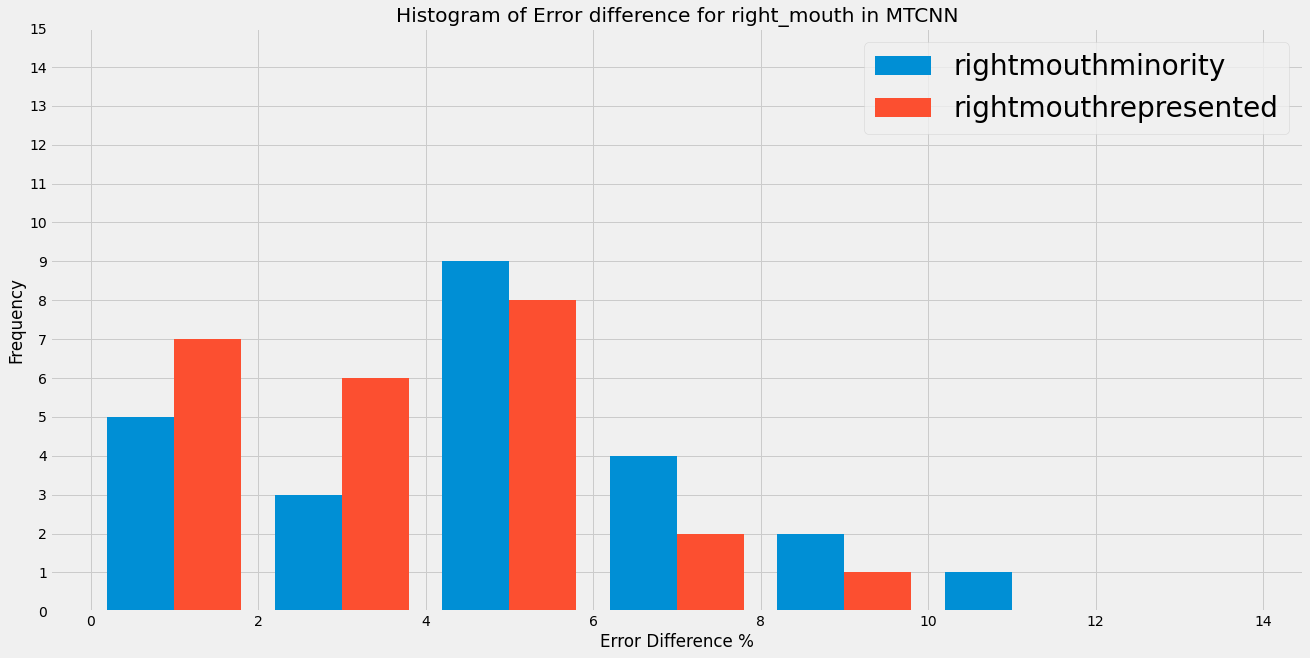

In [164]:
histogramSpecific("left_eye_distance","left_eye in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("right_eye_distance","right_eye in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("nose_distance","nose in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)

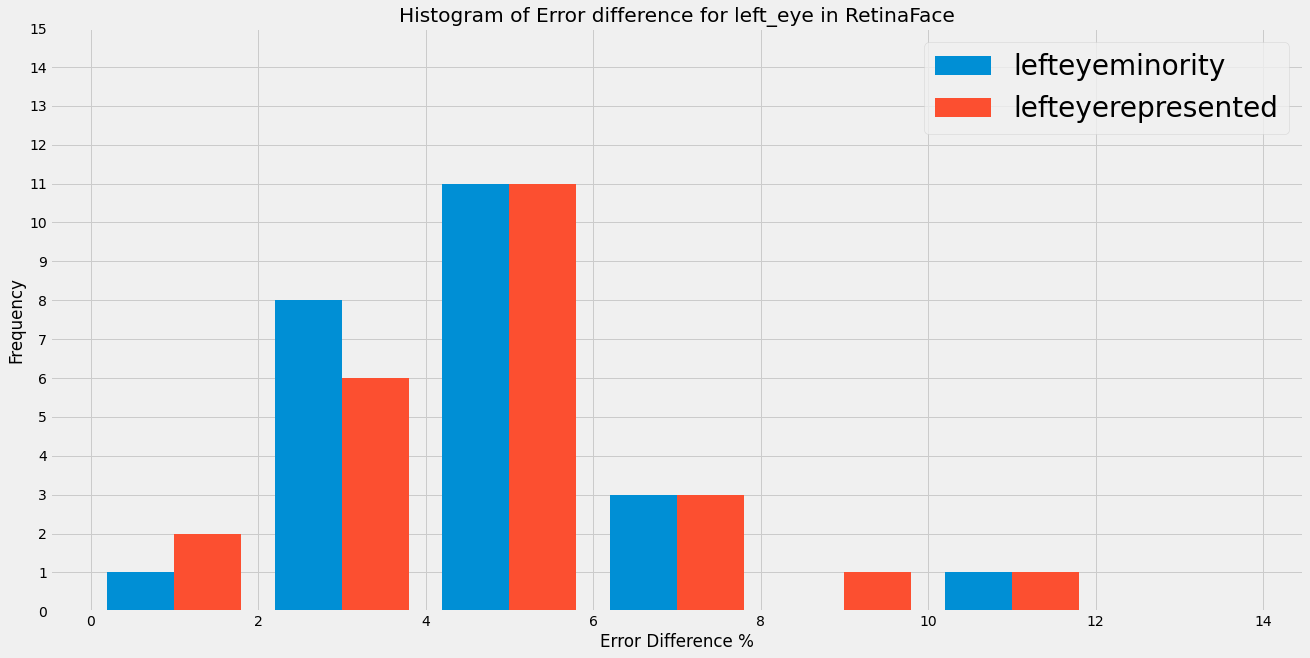

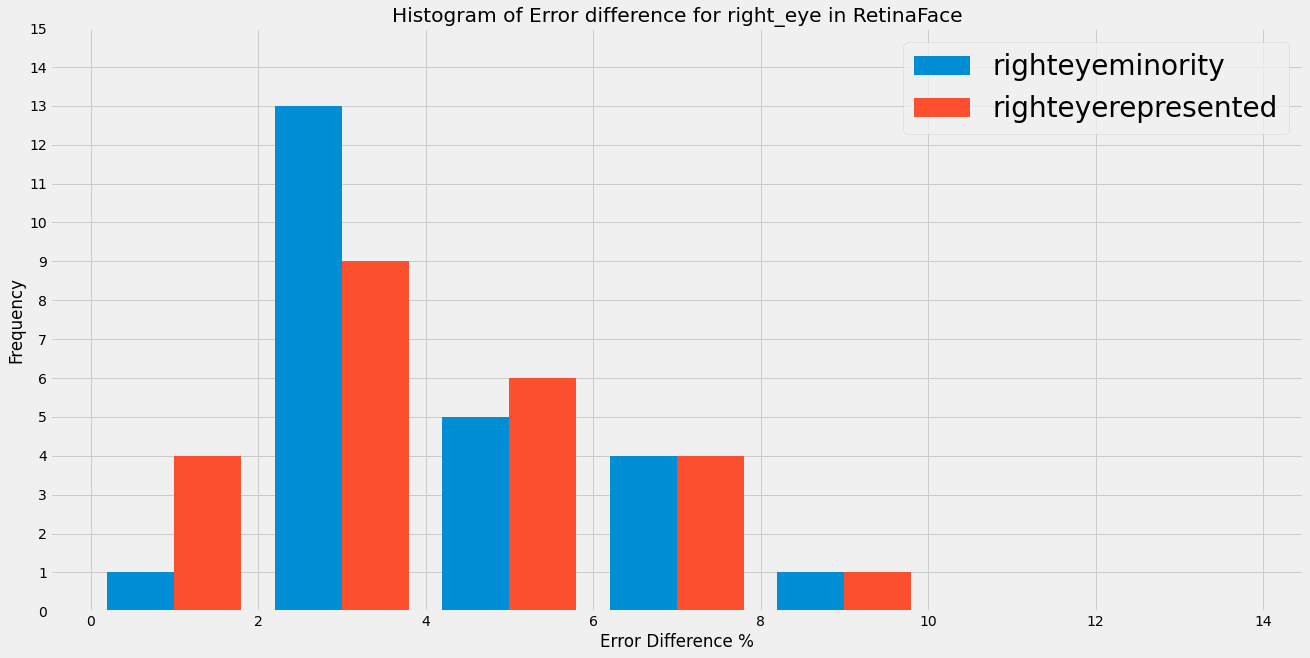

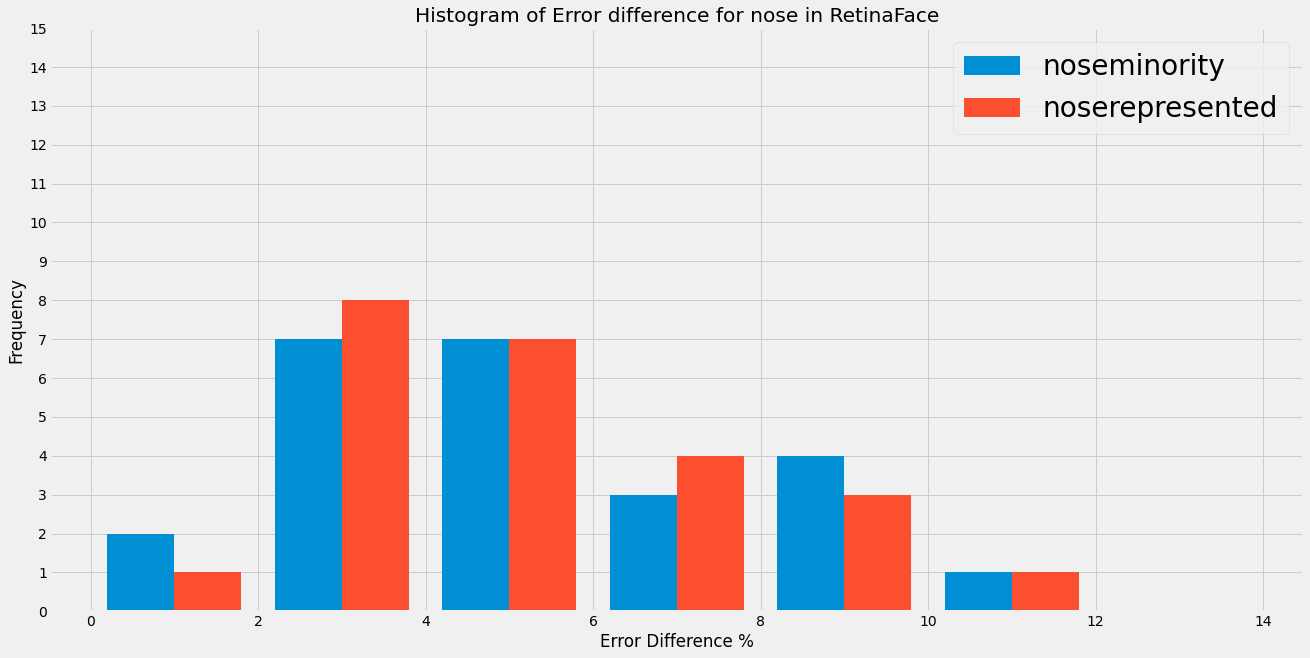

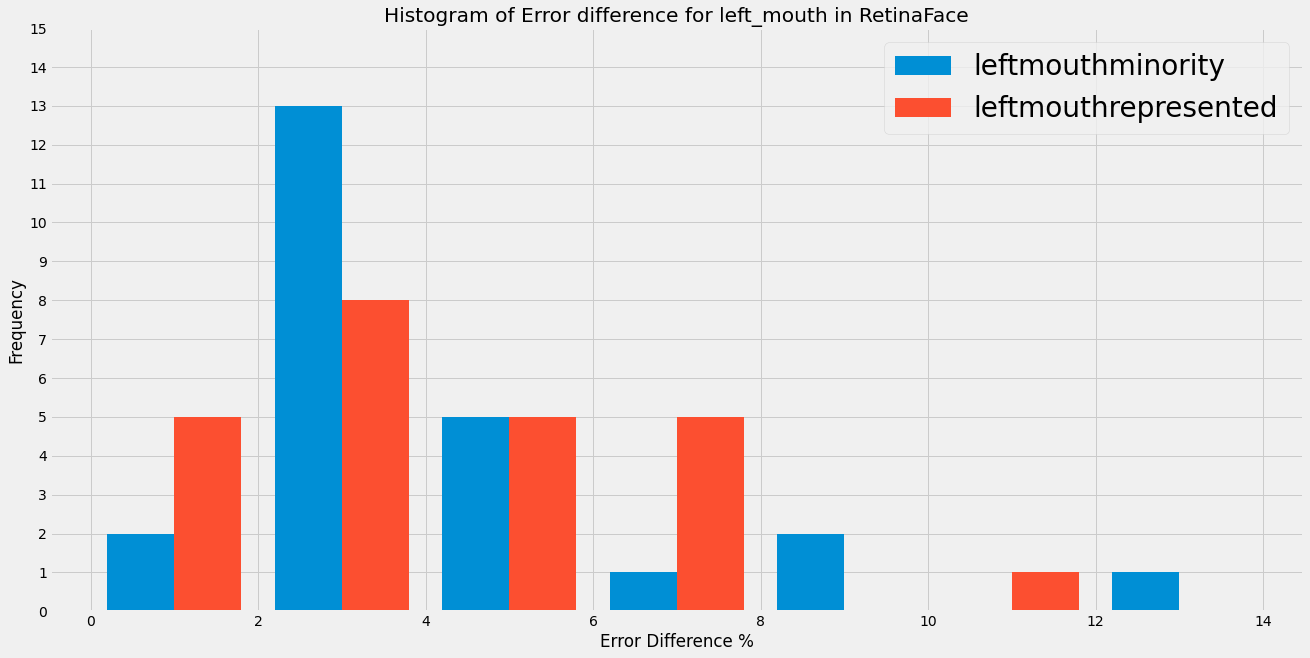

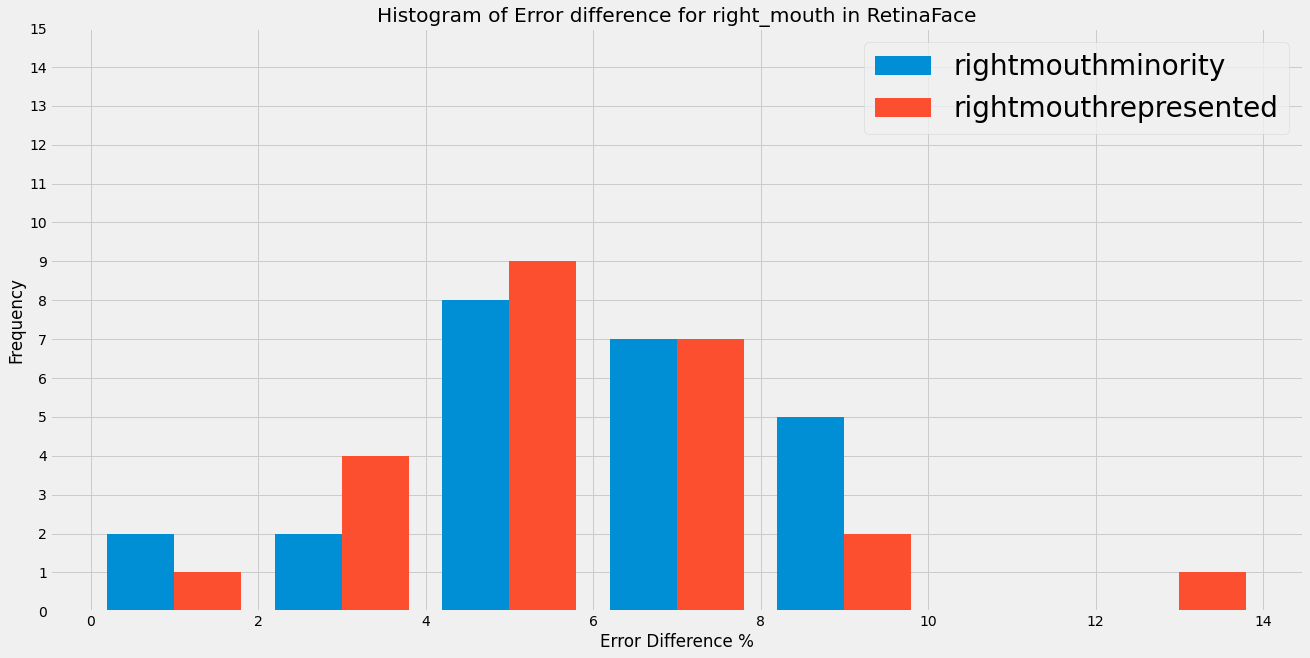

In [165]:
histogramSpecific("left_eye_distance","left_eye in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("right_eye_distance","right_eye in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("nose_distance","nose in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)

In [103]:
mt= []
rt=[]

feature = "right_mouth_distance"

m = (mtcnn_error_list_m[feature])
r = (mtcnn_error_list_r[feature])
mt+=m
rt+=r
m = (dlib_error_list_m[feature])
r = (dlib_error_list_r[feature])
mt+=m
rt+=r
m = (retinaface_error_list_m[feature])
r = (retinaface_error_list_r[feature])
mt+=m
rt+=r

print(len(mt))
print(len(rt))

import statistics
print(statistics.mean(mt))
print(statistics.mean(rt))



72
72
5.106478946031345
4.2009490281809025


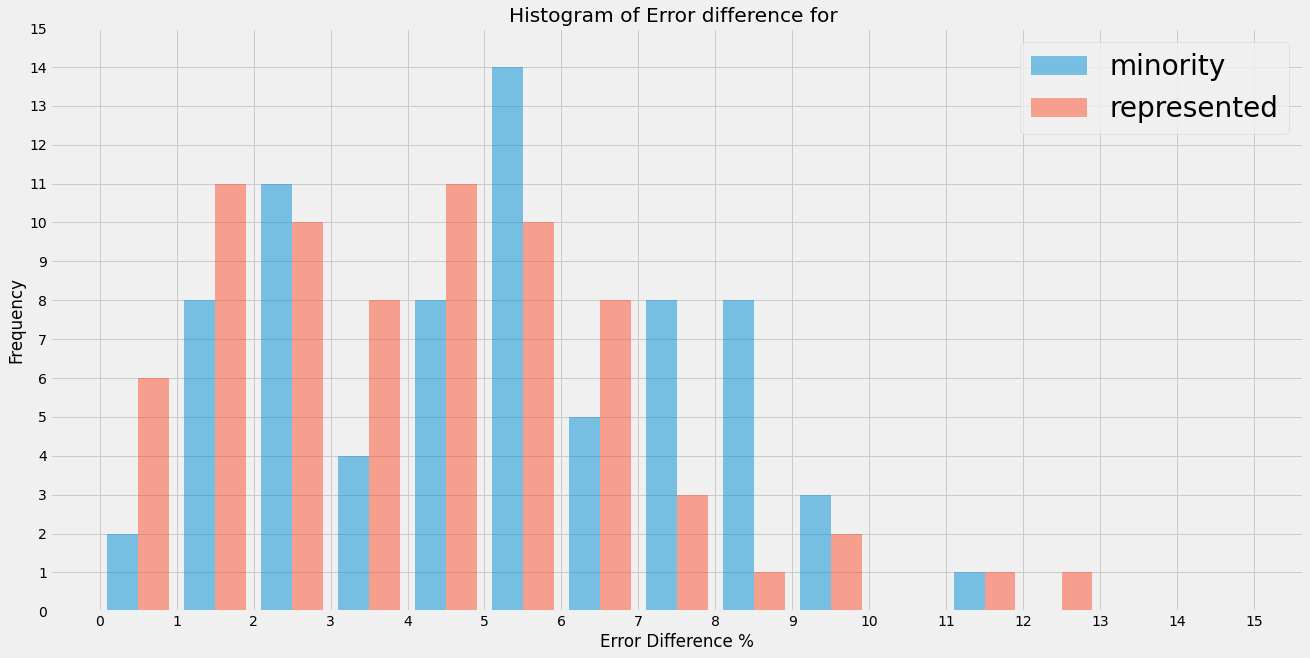

In [105]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

bins = np.linspace(0,15,16)

plt.hist([mt,rt], bins,label=["minority","represented"],alpha = 0.5)

# plt.hist([left_eye_m], bins,label=["left_eye_minority"],alpha = 0.5)
# plt.hist([left_eye_r], bins,label=["left_eye_represented"],alpha = 0.5)
plt.xticks(bins)
plt.yticks(np.linspace(0, 15, 16))
title = "Histogram of Error difference for " 
plt.title(title)
plt.xlabel('Error Difference %')
plt.ylabel('Frequency')
plt.legend(loc='upper right',prop={'size': 28})
plt.show()

In [ ]:
print(mtcnn_overlap)

[33.982888489457586, 24.00328914305976, 35.77594166997351, 38.44019725201133, 22.988000717383432, 24.91401797776373, 43.28182546814983, 28.32488760218064, 36.4666467748642, 23.35195517861236, 38.031161726358484, 29.77526281381209, 45.67534302662204, 26.29979558480405, 26.910306379157838, 28.426396022404248, 30.123837269295024, 18.906037216184313, 31.315424330500925, 29.420499255146265, 18.911086722592586, 12.133265806016443, 31.695281383871603, 27.263935499431252, 16.77384661610216, 16.34306542253668, 15.74034784135625, 23.64864575702414, 23.1008390539472, 21.672511794875337, 32.79895438540335, 27.341876870943693, 32.639259706107744, 24.87098023579108, 33.16098324175199, 22.974972091259158, 30.398500047733446, 25.213499043938832, 20.457662378987855, 31.05476479239222, 37.706592802760056, 28.6070975035566, 23.354057332694563, 25.97357048877408, 31.80206093491707, 25.696334763155942, 32.95523721220584, 26.074695750463274]


In [157]:
def bounding_box_overlap_new(algorithm):
  overlap_result = []
  for x in range(48):
    x=str(x)

    box = faces_annotated[x]["bounding_box"]
    rect1 = [box["x"],box["y"],box["w"],box["h"]]
    box = algorithm[x]["bounding_box"]
    rect2 = [box["x"],box["y"],box["w"],box["h"]]

    # print(rect1,rect2)
    

    intersectionArea = area(rect1,rect2);
    if intersectionArea == None:
      #print(x,"No overlap")
      results.append(0)
      overlap_result.append(0)
    else:
      unionArea = (rect1[2]*rect1[3]) + (rect2[2]*rect2[3]) - intersectionArea;
      overlap = intersectionArea/unionArea;
      #print(x,overlap*100)
      # results.append(overlap*100)
      overlap_result.append(overlap*100)


  return (overlap_result)

In [158]:
# import the necessary packages

# define the `Detection` object

def bb_intersection_over_union(a, b):
	# determine the (x, y)-coordinates of the intersection rectangle
  # algorithm = mtcnn_annotated
  # x ="0"
  # boxA = faces_annotated[x]["bounding_box"]
  # a = [boxA["x"],boxA["y"],boxA["w"],boxA["h"]]
  # boxB = algorithm[x]["bounding_box"]
  # b = [boxB["x"],boxB["y"],boxB["w"],boxB["h"]]


  a[2] = a[0] + a[2]
  a[3] = a[1] + a[3]

  b[2] = b[0] + b[2]
  b[3] = b[1] + b[3]

  boxA = a
  boxB = b

  xA = max(boxA[0], boxB[0])
  yA = max(boxA[1], boxB[1])
  xB = min(boxA[2], boxB[2])
  yB = min(boxA[3], boxB[3])
  # compute the area of intersection rectangle
  interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
  # compute the area of both the prediction and ground-truth
  # rectangles
  boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
  boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
  # compute the intersection over union by taking the intersection
  # area and dividing it by the sum of prediction + ground-truth
  # areas - the interesection area
  iou = interArea / float(boxAArea + boxBArea - interArea)
  #print(iou)
  # return the intersection over union value
  return iou*100

In [159]:
def overlap_work(algorithm):
  result = []
  for x in range(48):
    x=str(x)

    box = faces_annotated[x]["bounding_box"]
    rect1 = [box["x"],box["y"],box["w"],box["h"]]
    box = algorithm[x]["bounding_box"]
    rect2 = [box["x"],box["y"],box["w"],box["h"]]
    
    answer = bb_intersection_over_union(rect1,rect2)
    result.append(answer)
  return result

In [160]:
violajones_overlap = []

for x in range(48):
  x=str(x)

  box = faces_annotated[x]["bounding_box"]
  rect1 = [box["x"],box["y"],box["w"],box["h"]]
  result = []
  for y in violajones_annotated[x]:
    y=str(y)
    box = violajones_annotated[x][y]
    rect2 = [box["x"],box["y"],box["w"],box["h"]]
  
    answer = bb_intersection_over_union(rect1,rect2)
    result.append(answer)
    # print(x,y)

  # print(max(result),result)
  violajones_overlap.append(max(result))
print(violajones_overlap)

[75.66121392434955, 73.08572435865399, 72.81081882362528, 70.92668731444782, 74.99258997910441, 59.35716910818319, 81.55248301610972, 62.722420482609486, 62.14107681675202, 73.27394480831464, 82.52825745301669, 71.9369017971738, 73.71748110988173, 68.27687873495319, 69.41747156123957, 69.9036105468318, 75.99235655684933, 62.2917249459245, 69.41835274340049, 70.36915868614008, 74.70188533589214, 65.49801613919574, 71.66358111552871, 58.727276683285446, 63.15885373427196, 63.965299604704526, 64.0447287801888, 79.43471367796384, 55.9021604296603, 68.74670728923567, 70.27407170647024, 72.73208634053265, 79.79380724964, 76.05903519763844, 70.53689686100279, 76.2863400744712, 76.54923416304217, 70.768193825366, 78.65138550951485, 74.8275141975258, 89.17379862447197, 65.11416392080534, 74.57635768375488, 78.10781009285861, 72.88203922275515, 73.41262095298279, 78.50433554521184, 73.30655090714842]


In [161]:
mtcnn_overlap = (overlap_work(mtcnn_annotated))
dlib_overlap = (overlap_work(dlib_annotated))
retinaface_overlap = (overlap_work(retinanet_annotated))
print(violajones_overlap)
print(dlib_overlap)
print(mtcnn_overlap)
print(retinaface_overlap)

[75.66121392434955, 73.08572435865399, 72.81081882362528, 70.92668731444782, 74.99258997910441, 59.35716910818319, 81.55248301610972, 62.722420482609486, 62.14107681675202, 73.27394480831464, 82.52825745301669, 71.9369017971738, 73.71748110988173, 68.27687873495319, 69.41747156123957, 69.9036105468318, 75.99235655684933, 62.2917249459245, 69.41835274340049, 70.36915868614008, 74.70188533589214, 65.49801613919574, 71.66358111552871, 58.727276683285446, 63.15885373427196, 63.965299604704526, 64.0447287801888, 79.43471367796384, 55.9021604296603, 68.74670728923567, 70.27407170647024, 72.73208634053265, 79.79380724964, 76.05903519763844, 70.53689686100279, 76.2863400744712, 76.54923416304217, 70.768193825366, 78.65138550951485, 74.8275141975258, 89.17379862447197, 65.11416392080534, 74.57635768375488, 78.10781009285861, 72.88203922275515, 73.41262095298279, 78.50433554521184, 73.30655090714842]
[70.12742468914918, 79.91420240686013, 72.57093011956357, 72.55801155299781, 78.416992166506, 81

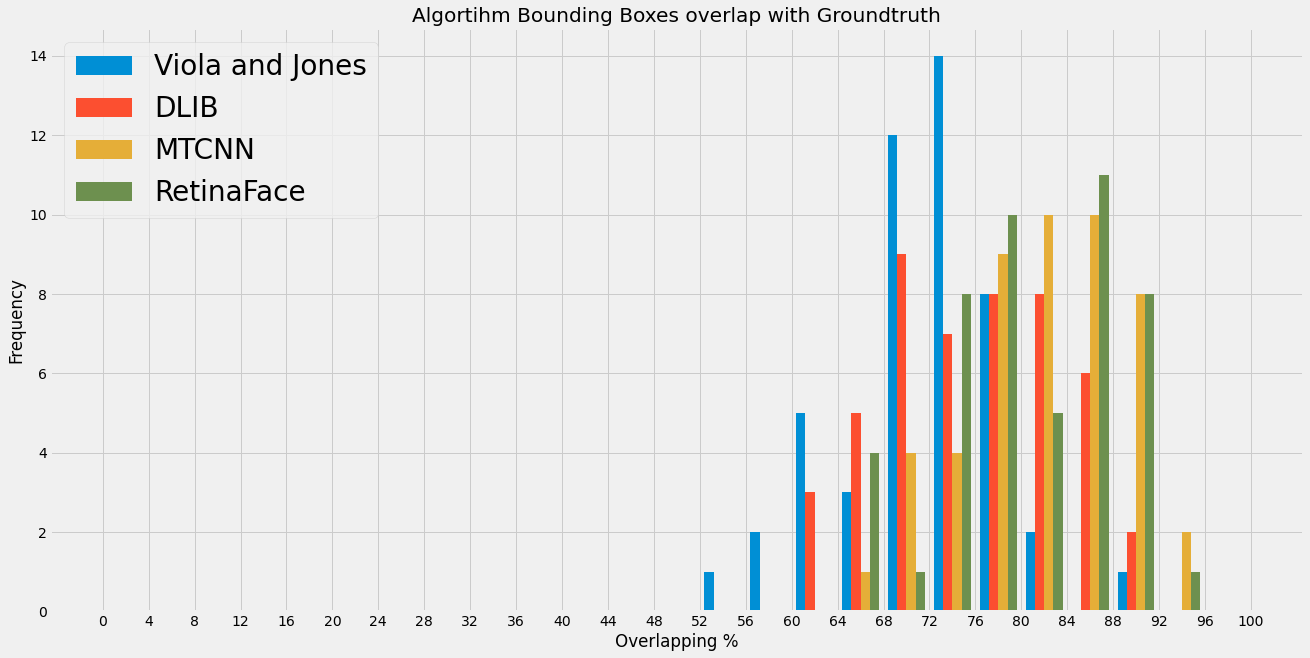

In [112]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))



bins = np.linspace(0, 100, 26)
#print(bins)

plt.hist([violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap], bins,label=["Viola and Jones","DLIB","MTCNN","RetinaFace"])
# plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
# plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
# plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
# plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
plt.xticks(np.linspace(0, 100, 26))
plt.yticks()
title = "Algortihm Bounding Boxes overlap with Groundtruth"
plt.title(title)
plt.xlabel('Overlapping %')
plt.ylabel('Frequency')
plt.legend(loc='upper left',prop={'size': 28})
plt.show()

In [162]:
#>=0  and <12
#>=24 and <36

def split_m_r(dataset):
  m = []
  r = []
  for x,value in enumerate(dataset):
    if x>=0 and x<12 or x>=24 and x<36:
      m.append(value)
    else:
      r.append(value)
  return m,r

In [163]:
dlib_overlap_m,dlib_overlap_r = split_m_r(dlib_overlap)
mtcnn_overlap_m,mtcnn_overlap_r = split_m_r(mtcnn_overlap)
retinaface_overlap_m,retinaface_overlap_r = split_m_r(retinaface_overlap)
violajones_overlap_m,violajones_overlap_r = split_m_r(violajones_overlap)


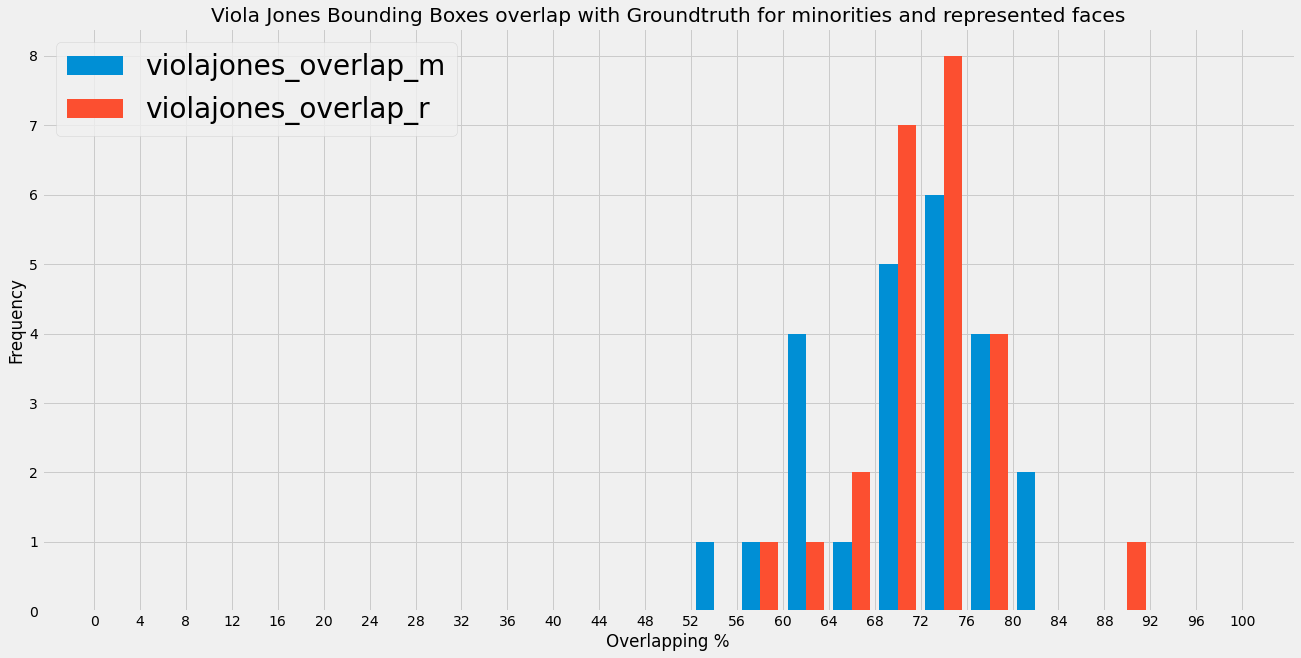

In [115]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))



bins = np.linspace(0, 100, 26)
#print(bins)

plt.hist([violajones_overlap_m,violajones_overlap_r], bins,label=["violajones_overlap_m","violajones_overlap_r"])
# plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
# plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
# plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
# plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
plt.xticks(np.linspace(0, 100, 26))
plt.yticks()
title = "Viola Jones Bounding Boxes overlap with Groundtruth for minorities and represented faces"
plt.title(title)
plt.xlabel('Overlapping %')
plt.ylabel('Frequency')
plt.legend(loc='upper left',prop={'size': 28})
plt.show()

In [ ]:
print(dlib_error_list["left_eye_distance"])
print(dlib_diff)

[4.835286942153485, 5.601156237936517, 3.79929989068989, 5.13967348291925, 6.771398081007134, 5.634965476838218, 1.9540704081723006, 3.9804201183203505, 4.123896775936521, 2.478712514326796, 6.533018909352337, 6.3816006769227664, 4.781189235301258, 7.8611785922036725, 4.905286169642471, 3.9997542626469222, 4.370965501083449, 2.414670123901531, 3.762603253270172, 4.758594357369406, 5.8880824713140445, 2.168891768278898, 7.3576813826328955, 7.176629546154777, 5.955725689256961, 5.984162924644012, 5.734087655621348, 8.791280331657946, 6.306731268022636, 4.364108434219703, 2.595153767351327, 2.9577329729202115, 6.870340527645522, 6.767579200892966, 5.359739244185362, 9.125956185766448, 5.488350189375663, 4.122582407975661, 3.6137814875641023, 3.4332927911058833, 4.89443638232878, 4.276121227052658, 8.523739945515192, 3.4978985287808246, 4.978073577357782, 7.6260188565175895, 3.60312842321004, 5.4461471891531135]
{'0': {'left_eye_distance': 4.835286942153485, 'right_eye_distance': 3.7826657

In [116]:
def average_diff(algorithm):
  m=0
  r=0

  for x in (algorithm):
    t= 0
    
    record = (algorithm[x])
    le = record["left_eye_distance"]
    re = record["right_eye_distance"]
    n = record["nose_distance"]
    lm = record["left_mouth_distance"]
    rm = record["right_mouth_distance"]

    t=(le+re+n+lm+rm)/5
    x=int(x)
    
    if (x>=0 and x<12 or x>=24 and x<36):
      m += t
    else:
      r += t

    # print(x,t)
  #print(m/24, r/24)
  return (m/24,r/24)
  # print(dlib_diff["9"])

In [117]:

m,r = average_diff(dlib_diff)
print("DLIB Average:")
print("Minority:",m, "\nRepresented:",r,"\n")
m,r = average_diff(mtcnn_diff)
print("MTCNN Average:")
print("Minority:",m, "\nRepresented:",r,"\n")
m,r = average_diff(retinaface_diff)
print("RetinaFace Average:")
print("Minority:",m, "\nRepresented:",r,"\n")


DLIB Average:
Minority: 4.245926066976387 
Represented: 3.827868270419487 

MTCNN Average:
Minority: 4.5393337849927216 
Represented: 3.66599812036597 

RetinaFace Average:
Minority: 4.882077159119511 
Represented: 4.849496664358129 



65 102 164 164


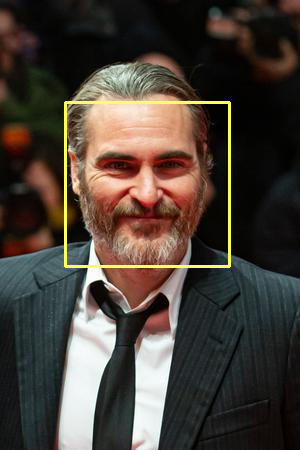

In [118]:
show_face_comparison_viola(17)


In [119]:
# show_face_comparison_viola(3)
for x in (violajones_annotated):
  if (len(violajones_annotated[x])) >1:
    show_face_comparison_viola(int(x))

In [ ]:
print(dlib_error_list)

{'left_eye_distance': [4.835286942153485, 5.601156237936517, 3.79929989068989, 5.13967348291925, 6.771398081007134, 5.634965476838218, 1.9540704081723006, 3.9804201183203505, 4.123896775936521, 2.478712514326796, 6.533018909352337, 6.3816006769227664, 4.781189235301258, 7.8611785922036725, 4.905286169642471, 3.9997542626469222, 4.370965501083449, 2.414670123901531, 3.762603253270172, 4.758594357369406, 5.8880824713140445, 2.168891768278898, 7.3576813826328955, 7.176629546154777, 5.955725689256961, 5.984162924644012, 5.734087655621348, 8.791280331657946, 6.306731268022636, 4.364108434219703, 2.595153767351327, 2.9577329729202115, 6.870340527645522, 6.767579200892966, 5.359739244185362, 9.125956185766448, 5.488350189375663, 4.122582407975661, 3.6137814875641023, 3.4332927911058833, 4.89443638232878, 4.276121227052658, 8.523739945515192, 3.4978985287808246, 4.978073577357782, 7.6260188565175895, 3.60312842321004, 5.4461471891531135], 'right_eye_distance': [3.7826657115758353, 2.8967192633

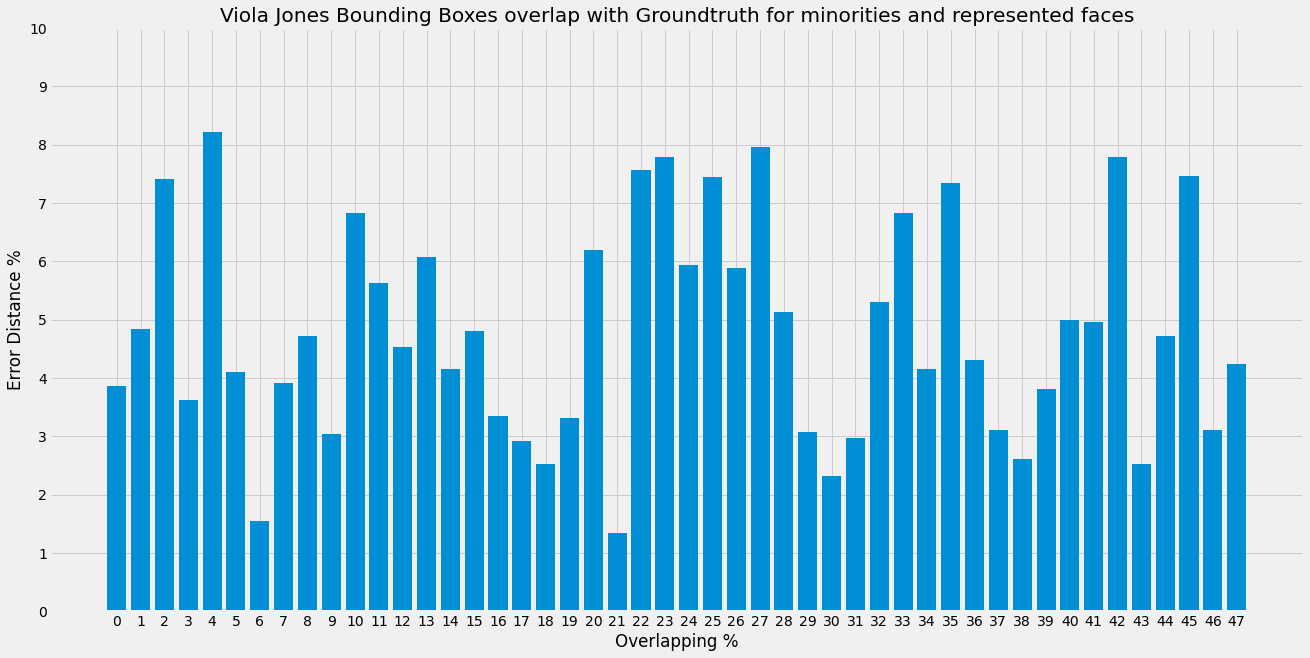

In [120]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))



bins = np.linspace(0, 100, 26)
#print(bins)

plt.bar(np.linspace(0,47,48),dlib_error_list["left_eye_distance"])
# plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
# plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
# plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
# plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
plt.xticks(np.linspace(0,47,48))
plt.yticks(np.linspace(0,10,11))
title = "Viola Jones Bounding Boxes overlap with Groundtruth for minorities and represented faces"
plt.title(title)
plt.xlabel('Overlapping %')
plt.ylabel('Error Distance %')
# plt.legend(loc='upper left',prop={'size': 28})
plt.show()